# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Natalia Melo Fernández (no. 449853)
    
    2. Lucía Ceña Alvo (no. 449125)
    
    3. Miguel Manzano Rodríguez (no. 447498)

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
!pip install p-decision-tree
!pip install graphviz
!pip install pydotplus
!pip install umap-learn
import pydotplus
from p_decision_tree.DecisionTree import DecisionTree
import networkx
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
import umap.umap_ as umap
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes.

In [2]:
df1 = pd.read_csv('AirBnB_original.csv')
display(df1.head(8))

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1
5,1004650,61300605564,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2015.0,71,14.0,7.0,49.0,5.0,1.0,1
6,1005202,90821839709,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,212.0,7.0,49.0,5.0,1.0,1
7,1005754,79384379533,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,0,strict,Private room,2005.0,1018,204.0,2.0,430.0,3.0,1.0,1


### Basic Cleaning

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove?

In [3]:
df_raw = df1.copy()
df1.dropna(0, inplace=True)
df1.reset_index(drop=True, inplace=True)
print('Number of rows removed: ' + str(df_raw.shape[0]-df1.shape[0]))


Number of rows removed: 1477


/tmp/ipykernel_1072/2510960711.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df1.dropna(0, inplace=True)


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed?

In [4]:
df_raw2 = df1.copy()
df1.drop_duplicates(subset=['id'], inplace=True)
print('Number of rows removed: ' + str(df_raw2.shape[0]-df1.shape[0]))

# Cleaning workspace
del(df_raw, df_raw2, df1)

Number of rows removed: 389


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first, the third quartile, and the standard deviation.

In [5]:
df2 = pd.read_csv('AirBnB_cleaned.csv')

print("Average price: $" + str(round(df2["price"].mean(),2)))
print("Standard deviation: $" + str(round(df2["price"].std(),2)))
print('First quartile: $' + str(round(np.percentile(df2['price'].to_numpy(), 25), 2)))
print('Third quartile: $' + str(round(np.percentile(df2['price'].to_numpy(), 75), 2)))

Average price: $625.46
Standard deviation: $331.24
First quartile: $340.0
Third quartile: $913.0


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset.

Optimum bin number: 70


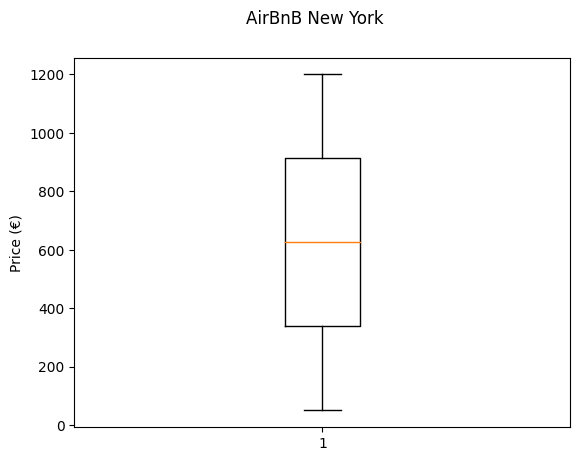

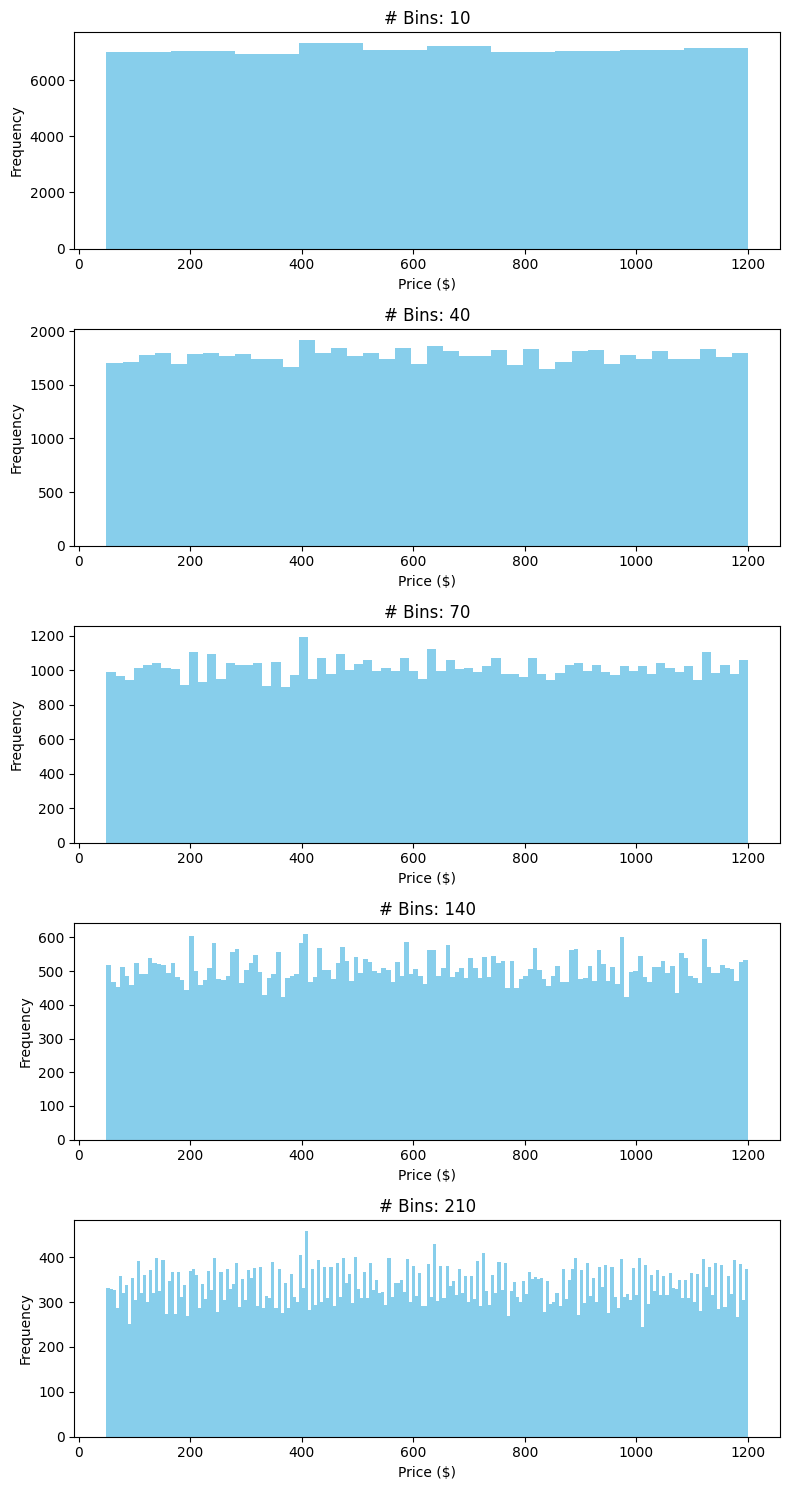

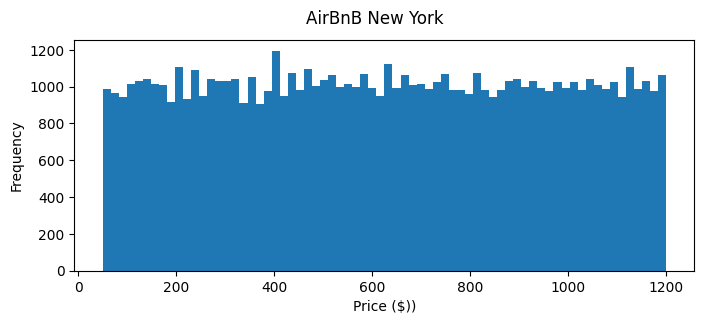

In [6]:
#     BOXPLOT
fig = plt.figure()
plt.boxplot(df2['price'], vert=True)
fig.suptitle('AirBnB New York')
plt.ylabel('Price (€)')


#     HISTOGRAM

# We define a list of possible bins to study the sensitivity of data trends
# based on the amount of bins used. In order to detect and avoid underfitting  
# and overfitting and select an amount of bins that best defines the trends 
# in the dataset.

bin_numbers = [10, 40, 70, 140, 210]

fig_hist, ax_hist = plt.subplots(5, 1, figsize = (8, 15), tight_layout=True)

for idx, bin_number in enumerate(bin_numbers):
  ax_hist[idx].hist(df2['price'], bins = bin_number,  color = "skyblue", lw=0)
  ax_hist[idx].set_title('# Bins: ' + str(bin_number))
  ax_hist[idx].set(xlabel='Price ($)', ylabel= 'Frequency')

# We consider that the optimum amount of bins is 70. Multiples of seven were used
# as the number of instances in the dataset is 70842. 

# Plot of the price distribution using this optimum amount of bins
print('Optimum bin number: 70')
fig_hist_opt = plt.figure(figsize = (8, 3))
plt.hist(df2['price'], bins=70)
fig_hist_opt.suptitle('AirBnB New York')
plt.xlabel('Price ($))')
plt.ylabel('Frequency')

del(bin_number, bin_numbers, fig, fig_hist, fig_hist_opt, idx, ax_hist)


### Exploring Price Relationships

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment

In [7]:
allfeatures = list(df2.columns.values)

features_with_unique_values = []

for i in allfeatures:
  if len(df2[i].unique())==1:
    features_with_unique_values.append(i)
    df2.drop(i,axis=1,inplace=True)


print('Features with one unique value: ' + str(features_with_unique_values))


allfeatures = list(df2.columns.values)

for i in allfeatures:
  if abs(len(df2)-len(df2[i].unique()))<0.01*len(df2):
    print('There is almost the same amount of instances for ' + str(i) + ' as for the whole dataset')
    
df2.drop('host id',axis=1,inplace=True)
display(df2)

del(i,allfeatures,features_with_unique_values)

Features with one unique value: ['country', 'country code', 'instant bookable']
There is almost the same amount of instances for id as for the whole dataset
There is almost the same amount of instances for host id as for the whole dataset


,id,neighborhood group,neighborhood,lat,long,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1002102,Manhattan,Midtown,40.75362,-73.98377,moderate,Entire home/apt,2007,142,28,7,45,4,2,2
1,1002403,Manhattan,Harlem,40.80902,-73.94190,flexible,Private room,2005,620,124,3,0,5,1,1
2,1002755,Brooklyn,Clinton Hill,40.68514,-73.95976,moderate,Entire home/apt,2005,368,74,7,270,4,1,2
3,1003689,Manhattan,East Harlem,40.79851,-73.94399,moderate,Entire home/apt,2009,204,41,7,9,3,1,1
4,1004650,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,moderate,Private room,2015,71,14,7,49,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70837,57353610,Queens,Bayside,40.75047,-73.75349,moderate,Private room,2007,103,21,7,40,1,5,1
70838,57358028,Queens,East Elmhurst,40.76245,-73.87938,strict,Private room,2022,982,196,1,239,2,2,1
70839,57358580,Queens,Edgemere,40.59380,-73.77373,moderate,Private room,2020,946,189,1,76,1,1,1
70840,57359685,Manhattan,SoHo,40.72318,-74.00223,flexible,Entire home/apt,2020,1043,209,2,21,4,2,1


_Answer:_ 

*ID is a unique identifier to determine a certain instance of the dataset. Therefore, it does have an impact on the price of the apartment but its useful to position instances inside of the dataset. It could be kept as an indexing feature.*

*There is one host id less than instances in the dataset, which means only one host owns more than one apartment. This is an exception and could be discarded.Therefore, it could be only used as an indexing characteristic. We already have 'ID' for that purpose, so this feature does not add more information.*

*The attributes "country", "country code" and "instant bookable" are discarded. This is because they have one single associated value in all the dataset, and therefore, are not useful to determine the price of the room.*

*The features longitude and latitude are not necessarily relevant, given that the dataset also includes the neighbourhood and neighbourhood group. These characteristics also define the location of the apartments and are more suitable to the analysis. Features like neighbourhood and neighbourhood group already allows us to determine apartments that are near to each other, without the need to preprocess the data. The longitude and latitude features would have to be grouped into clusters to evaluate the effect of the geographical location of the apartment on its value.*

### Univariate Analysis

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision?

Coefficient of determination: 0.99998


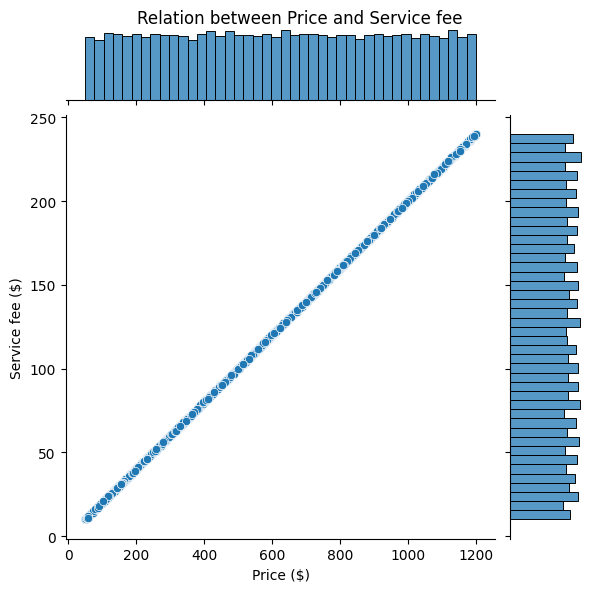

In [8]:
p = sns.jointplot(data=df2[['price','service fee']], x=df2['price'], y=df2['service fee'], height=6, ratio=5, space=0.2)
p.set_axis_labels('Price ($)', 'Service fee ($)')
p.fig.suptitle("Relation between Price and Service fee")
p.fig.subplots_adjust(top=0.95)
del(p)

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df2['price'],df2['service fee'])
print('Coefficient of determination: ' + str(np.round(r_value**2,5)))

del(p_value,intercept,r_value,slope,std_err)

_Answer:_

*There is a positive linear correlation between the price of the product and the service fee, as it has a coefficient of determination $R^{2}\approx 1$. It is useful to predict prices within this range and can be easily extrapolated for values outside this region.*


Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation.

Coefficient of determination: 0.0


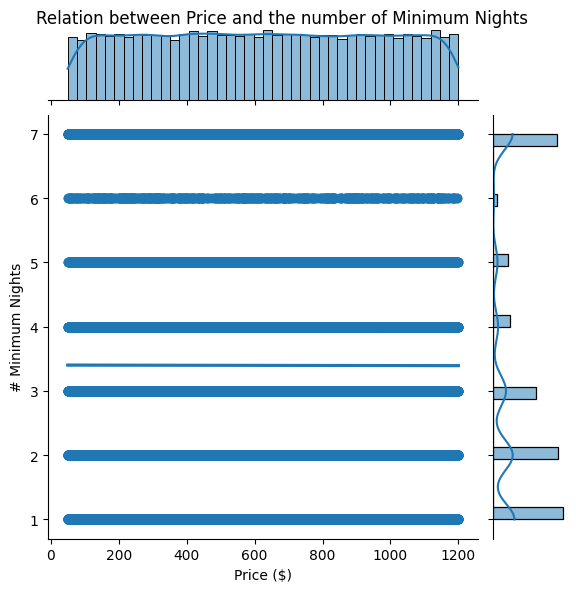

In [9]:
p = sns.jointplot(data=df2[['price','minimum nights']], x=df2['price'], y=df2['minimum nights'], height=6, ratio=5, space=0.2, kind="reg")
p.set_axis_labels('Price ($)', '# Minimum Nights')
p.fig.suptitle("Relation between Price and the number of Minimum Nights")
p.fig.subplots_adjust(top=0.95)
del(p)

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df2['price'],df2['minimum nights'])
print('Coefficient of determination: ' + str(round(r_value**2,2)))

del(p_value,intercept,r_value,slope,std_err)

_Answer:_

*The regression does not fit the data in an useful way. The coefficient of determination $R^2 \approx 0.0$. Therefore, regression fails to accurately model the relation between price and minimum nights. We can indeed find apartments of any price for the given range independently of the number of minimum nights. Nevertheless, we can obtain which number of minimum nights is more common, but we could obtain that information with a histogram.*

To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price?

<Figure size 640x480 with 0 Axes>

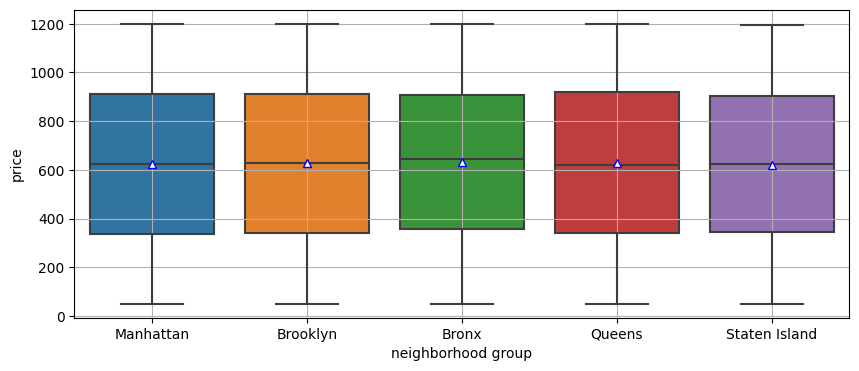

<Figure size 640x480 with 0 Axes>

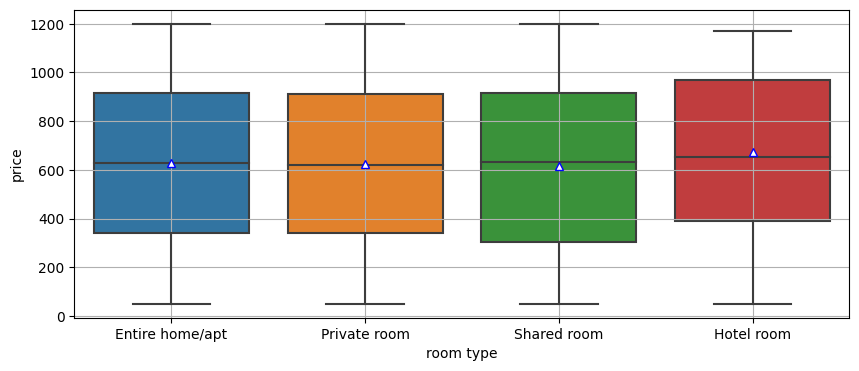

<Figure size 640x480 with 0 Axes>

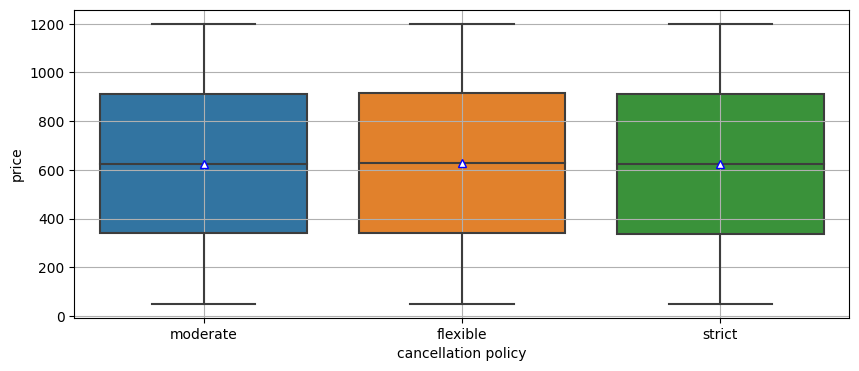

<Figure size 640x480 with 0 Axes>

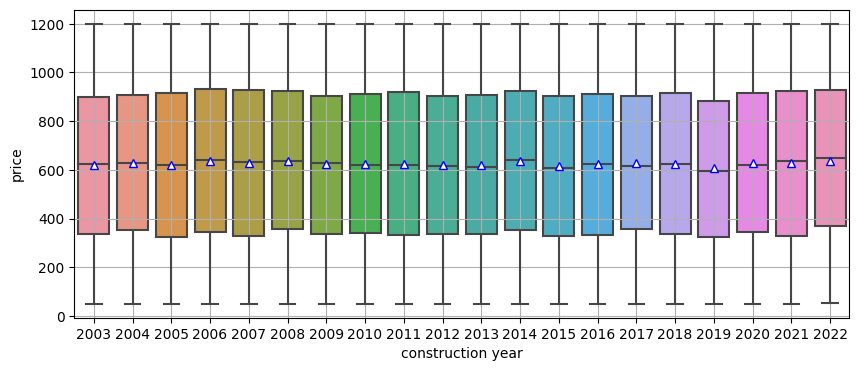

<Figure size 640x480 with 0 Axes>

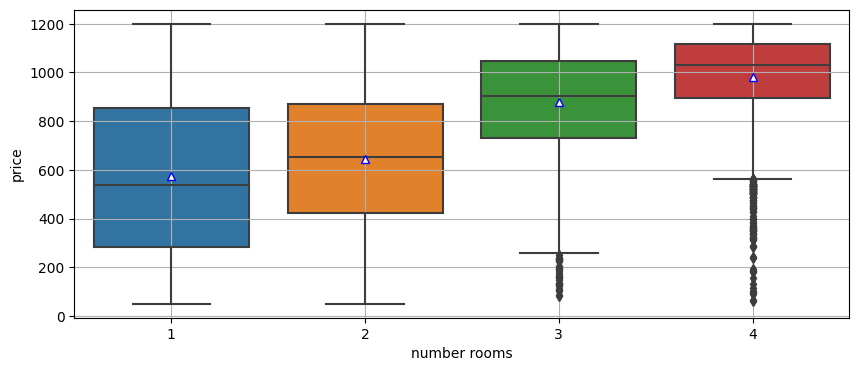

In [10]:
uvFeatures=['neighborhood group','room type', 'cancellation policy', 'construction year', 'number rooms']

for i in uvFeatures:
  plt.figure()
  plt.figure(figsize=(10,4))
  sns.boxplot(x=i, y="price", data=df2[[i, 'price']], showmeans=True, meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
  plt.grid()

del(i,uvFeatures)

_Answer:_

**Neighbourhood group:** *There are little to few differences between the four neighbourhood groups included in the dataset. Therefore it cannot be used to 
extract meaningful information.*

**Room type:** *Prices for private rooms and entire apartment present similar box plots. For hotel rooms, the prices are a bit higher according to the median and the quartiles. On the other hand, shared rooms present lower prices, with a noticeable lower first and third quartile.*

**Cancellation policy:** *The three categories show comparable boxplots. This feature does not give meaningful information about the price.*

**Construction year:** *It seems like there is an arbitrary variation of prices attending to the construction year. Therefore, we cannot determine a definite trend from the shown boxplot (i.e. an continous increase/decrease of average price over the time of the construction).*

**Number of rooms:** *This feature largely affects the price of the apartments, with a considerable increase in the median price as the number of rooms grows. The range of prices (difference between the first and third percentile) also diminishes when more rooms are taken into account. As the number of rooms increases, the median price moves towards the third percentile. Meaning that on average, the rooms tend to be more 'expensive'. For three and four rooms, we observe outliers which mean there are cheaper options in both cases. However, these are rare.*


### Multivariate Analysis

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision.

#### Multivariate Analysis for Neighborhood Group

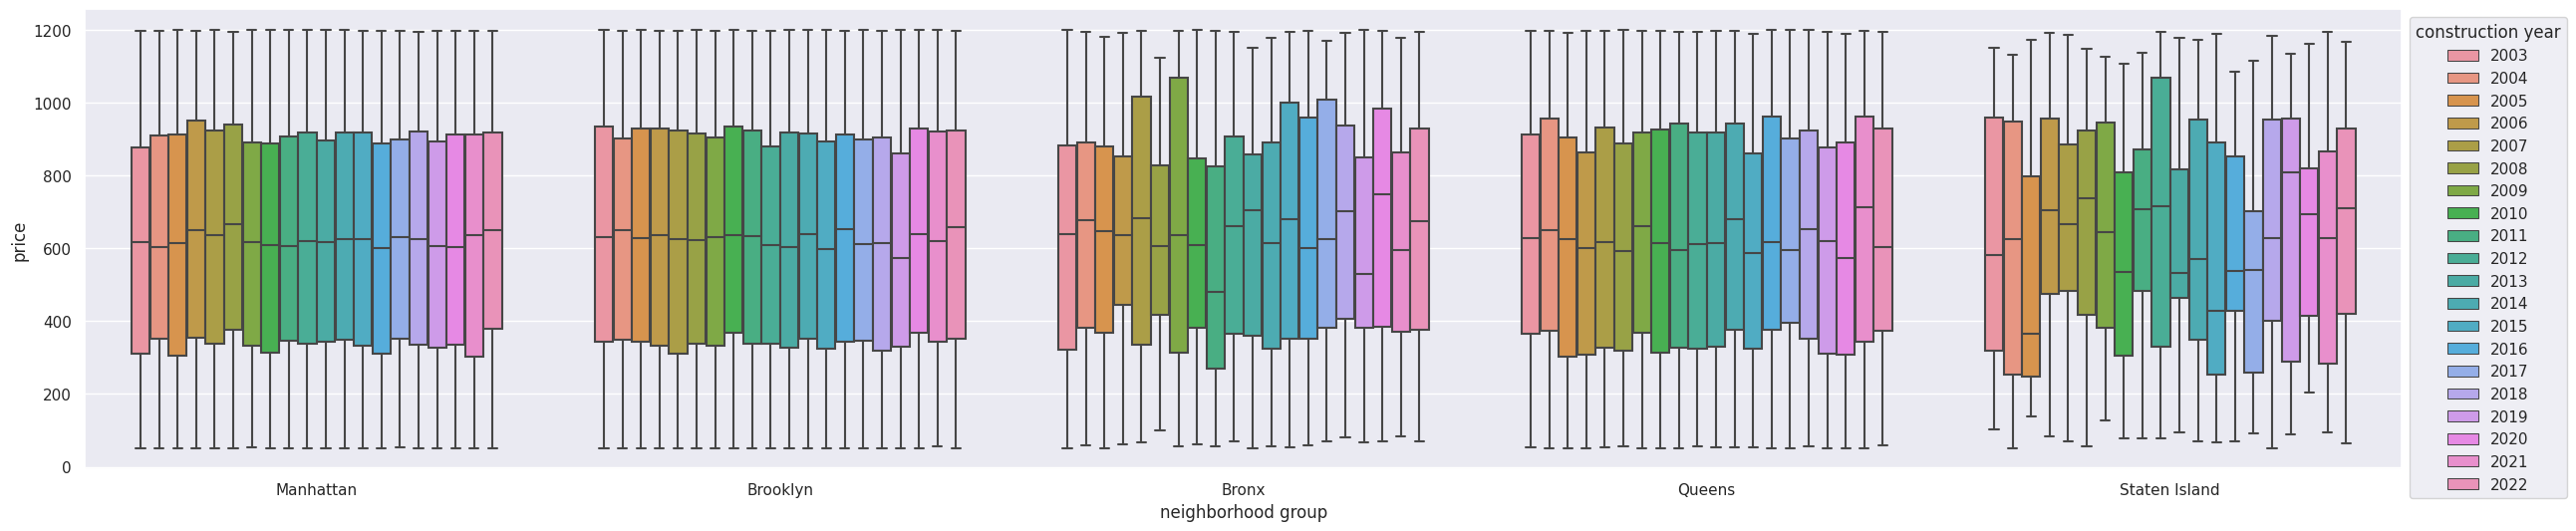

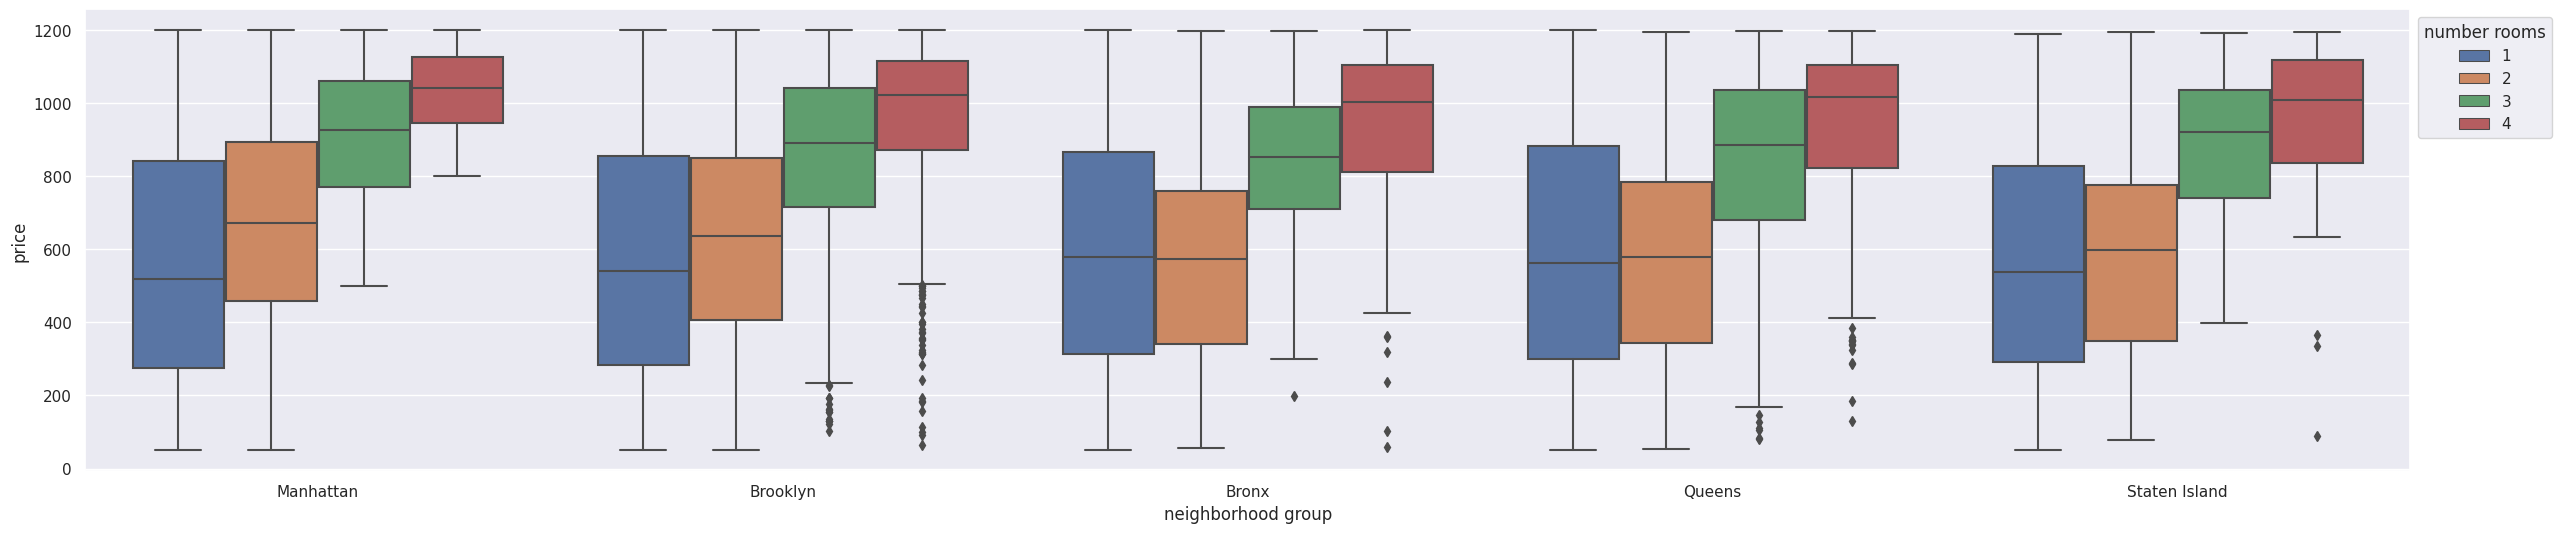

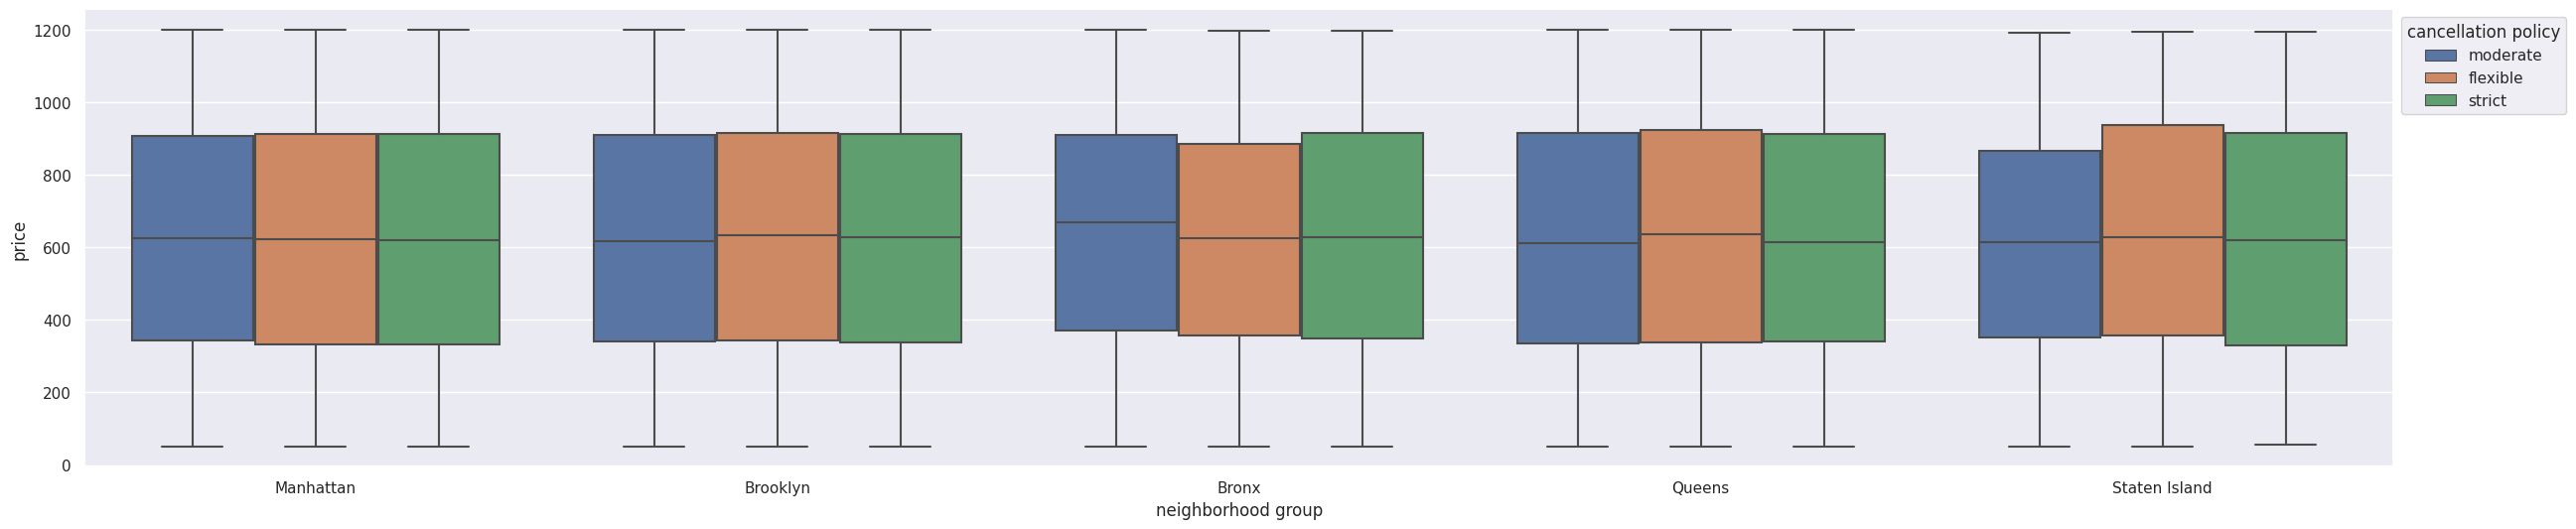

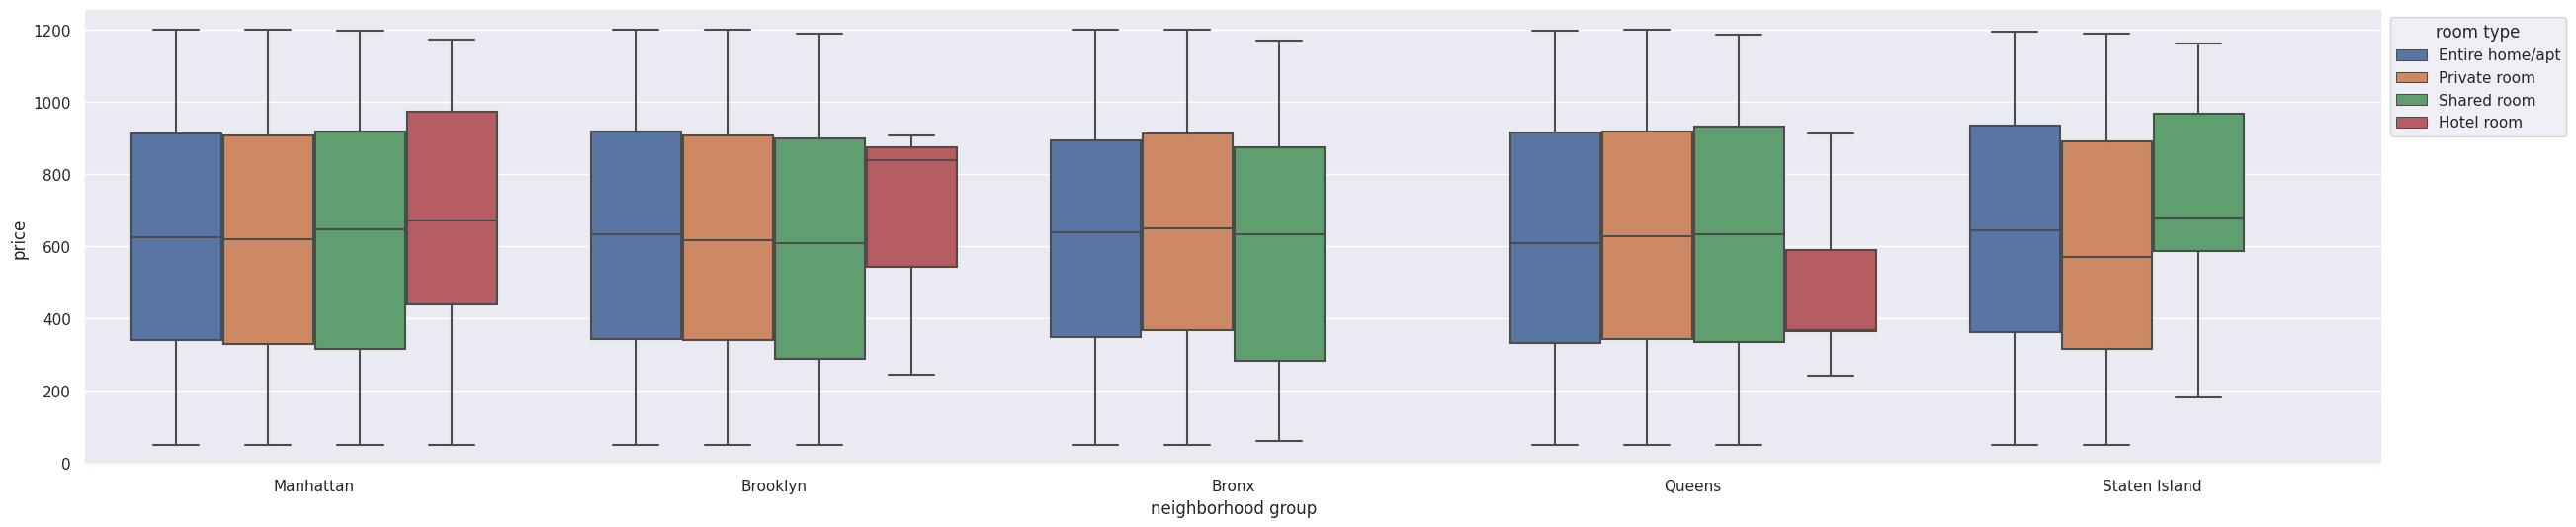

In [11]:
mvFeatures = ['construction year', 'number rooms', 'cancellation policy', 'room type']
sns.set(rc={'figure.figsize':(30,6)})

for i in mvFeatures:
  plt.figure()
  ax = sns.boxplot(x = df2['neighborhood group'], y = df2['price'], hue = df2[i])
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [12]:
filter = (df2['neighborhood group']=='Queens') & (df2['room type']=='Hotel room')
print('Median: $' + str(np.median(df2['price'][filter])))
print('First quartile: $' + str(np.quantile(df2['price'][filter],0.25)))
print('Third quartile: $' + str(np.quantile(df2['price'][filter],0.75)))

Median: $367.5
First quartile: $364.75
Third quartile: $589.25


_Answer:_
**Construction year:** *As it can be seen from the graph there is a difference in the price volatility between neighbourhood groups. Brooklyn, Manhattan and Queens present a median price that stays aproximately constant throughout the years, while Bronx and Staten Island show higher price variations between years. While we can not diagnose with the given information the reason behind this variations we come to the next conclusions: there is not a period of time in which quality or other characteristics of construction have led to an increase or decrease of the price all around the city and there are two neighbourhoods (Bronx and Staten Island) in which the construction year has more impact in the price (maybe because of the conditions of the buildings).*

**Number of rooms:** *In general, price increases with the number of rooms and the range of prices diminishes. That being said, we see two different behaviours between Brooklyn and Manhattan (group 1) and the other three neighbourhood groups (group 2). In group 1 there is an appreciable distinction in the price for one and two room apartments. The increase is slightly bigger than in group 2. Median values are also a bit higher in group 1.*

**Cancellation policy:** *We cannot see a meaningful effect in price because of cancellation policy in the different neighbourhood groups.*

**Room type:** *Attending to every room type except hotels, we observe that the price range is similar for the three room types. The boxplot is approximately simetrical, meaning that the room offer distribution is more or less uniform across the price range. There is some variation in the median values. We want to highlight the price of shared rooms in Staten Island, which is higher and has a narrower price range than it could be expected looking at the other neighbourhood groups behaviour.*

*Looking at the hotel rooms, we observe that there is no offer neither in Staten Island, nor in Bronx. In Brooklyn, prices are higher in comparison with the other room types. It can be seen that the median value is near to the third quartile and the highest value, which means there are a larger amount of 'expensive' hotel rooms that cheaper options. In Manhattan, although the median price for this kind of room is higher, the rest of the boxplot is similar to the other room types. At first sight, we cannot observe clearly the median of hotel room price in Queens. By calculating it (previous code box) we see that there's a difference of $2.75 with respect to the first quartile. This means that the offer concentrates around lower prices. Nevertheless, there are still more expensive options available.* 


#### Multivariate Analysis for Room Type

#Entire home/apt: 38415
#Private room: 30899
#Shared room: 1445
#Hotel room: 83


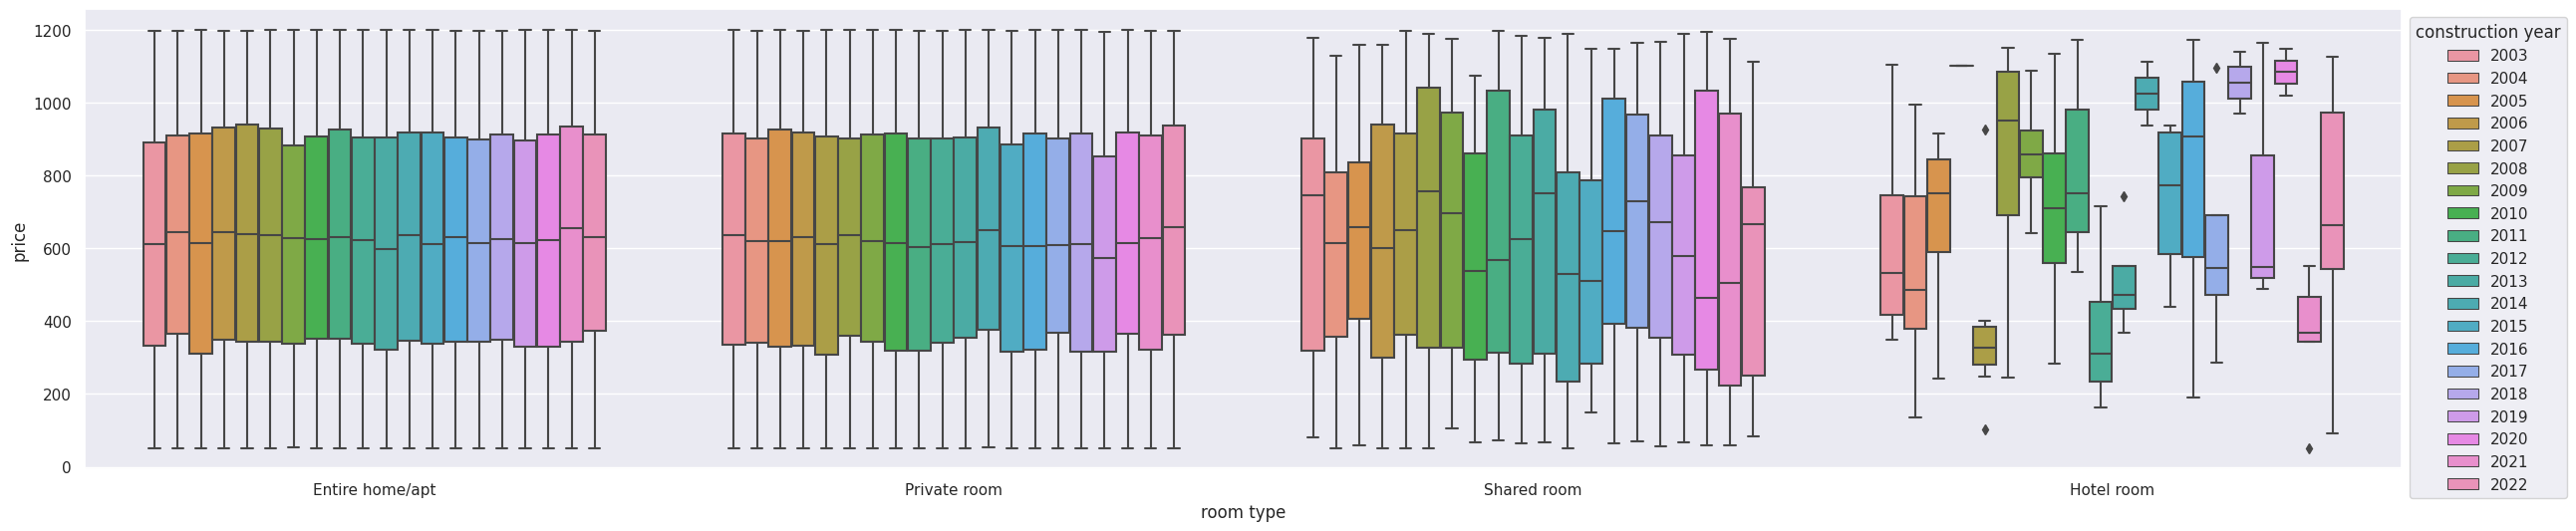

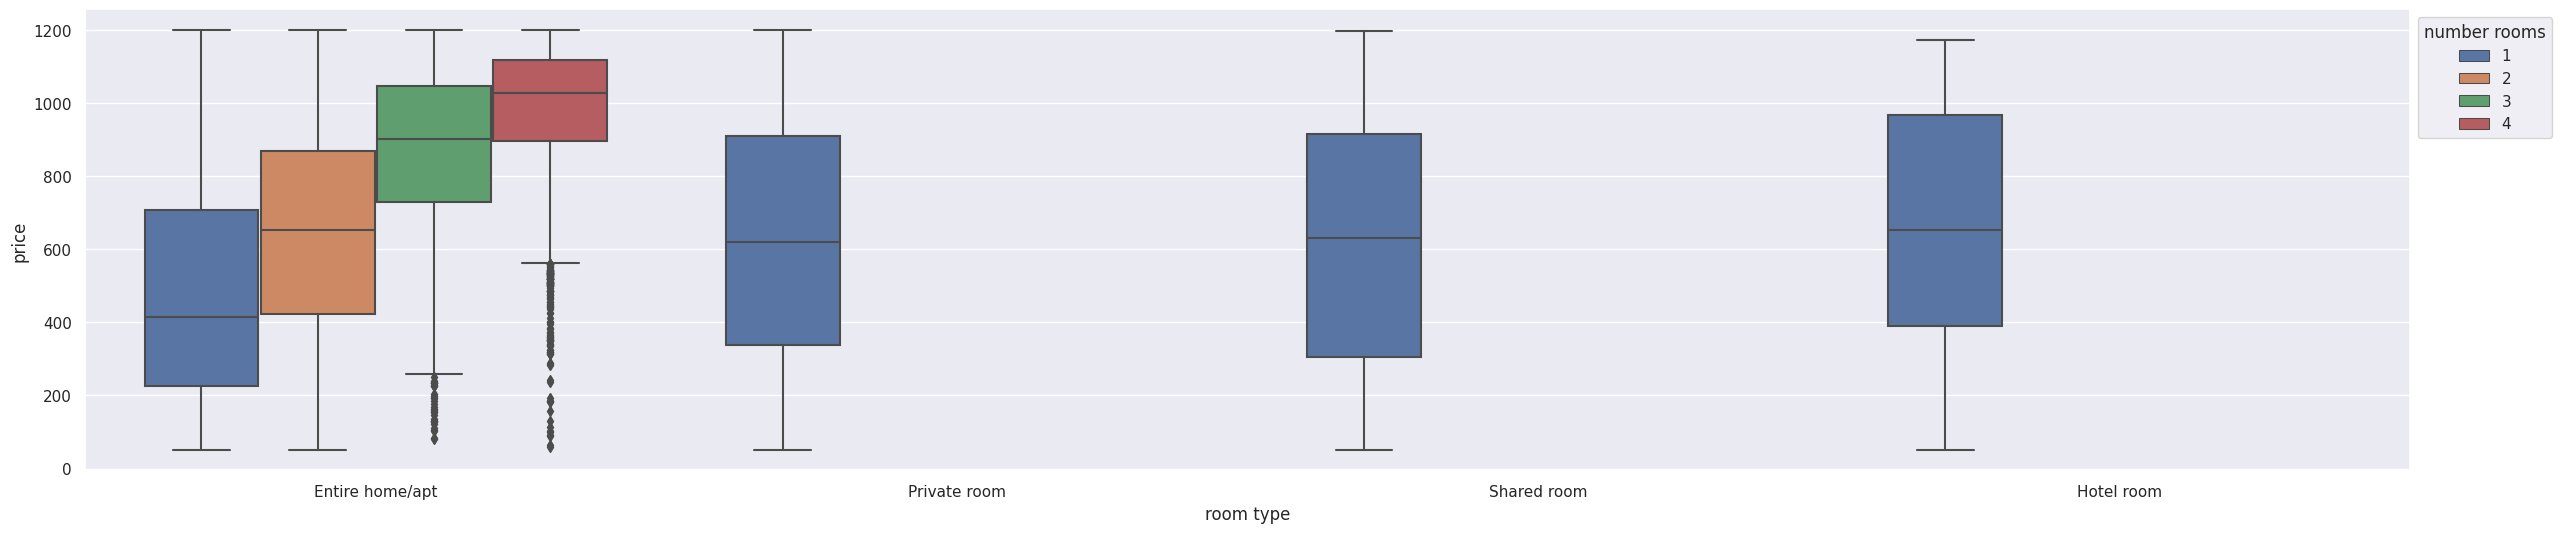

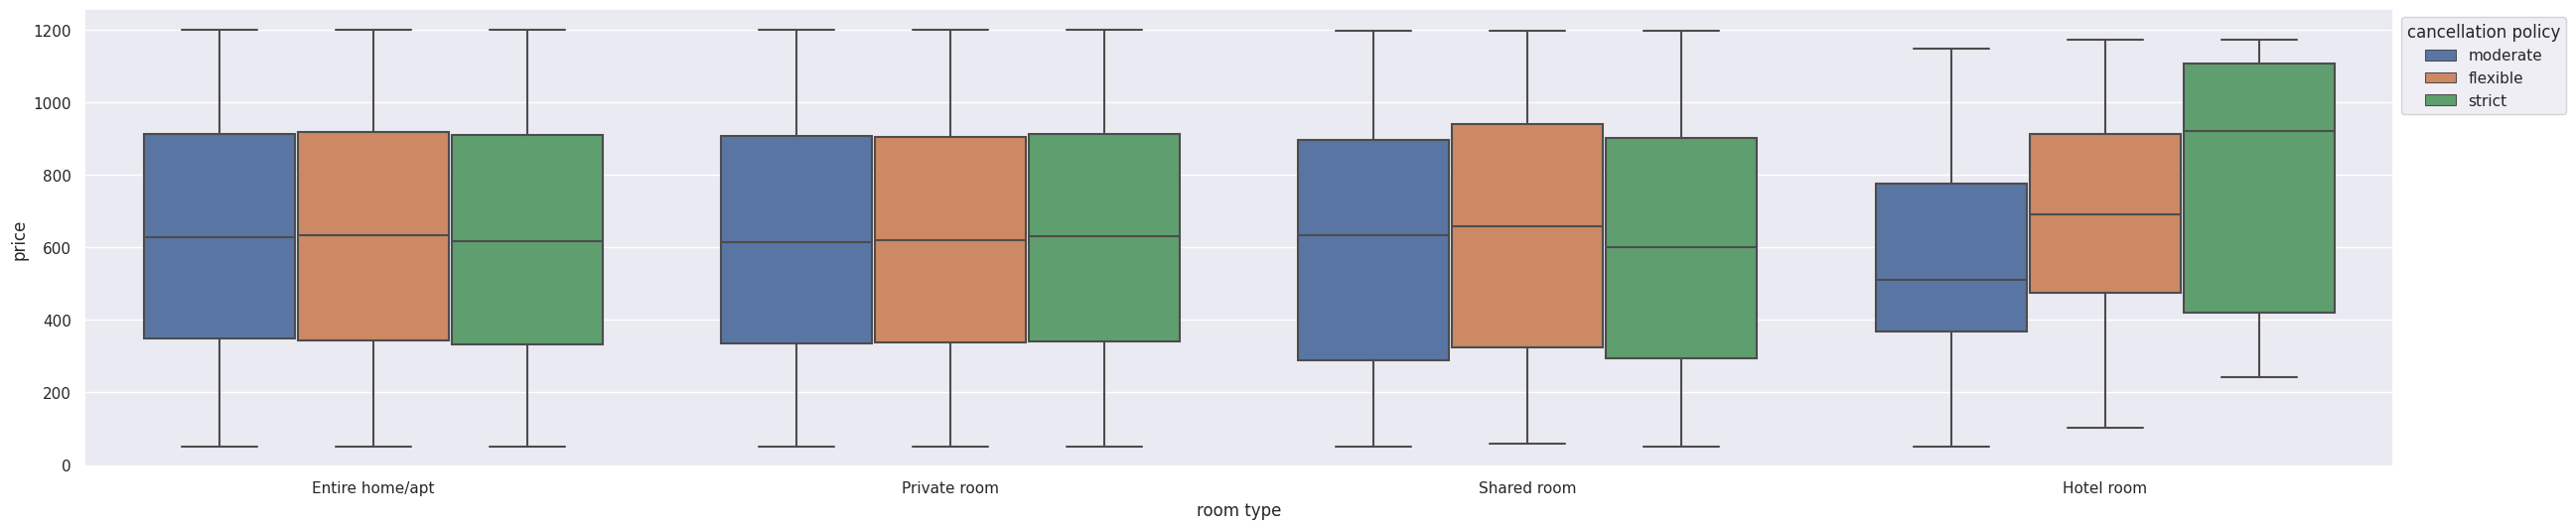

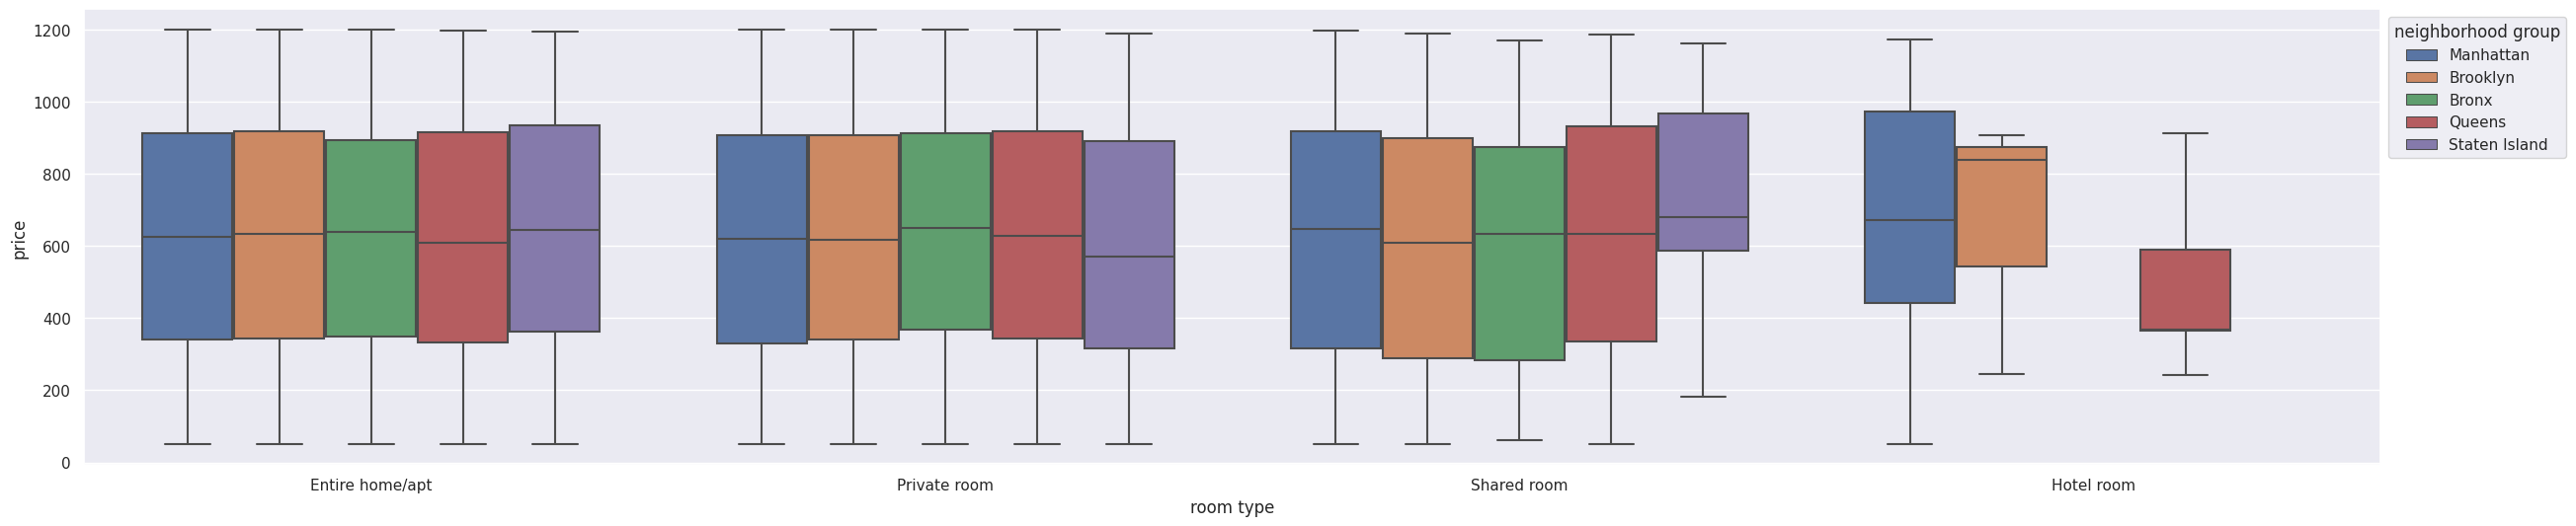

In [13]:
mvFeatures = ['construction year', 'number rooms', 'cancellation policy', 'neighborhood group']

sns.set(rc={'figure.figsize':(30,6)})

for i in df2['room type'].unique():
  filter = (df2['room type']==i)
  print('#' +  str(i) +': ' + str(df2['id'][filter].count()))

for i in mvFeatures:
  plt.figure()
  ax = sns.boxplot(x = df2['room type'], y = df2['price'], hue = df2[i])
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


_Answer:_
**Contruction year**: *For the two left graphs, we can observe a uniform tendency over the construction years. For the hotel rooms the distribution seems more random. We have obtained the number of instances of each room type as seen above. There are significantly less instances for hotel room, resulting in a more underrepresented dataset. Something similar, but no so drastic, happens for shared rooms.*

**Number of rooms:** *It is obvious that private rooms, hotel rooms and shared rooms only have one room. The boxplots are also similar. For entire apartments, the median price increases and the price range narrows as the number of rooms increases. For one room apartments, the median price is nearer to the lower quartile, meaning there are more 'cheap' options. On the contrary, observing the four-room apartments the median is nearer to the third quartile, so the offer of 'expensive' apartments is bigger. There are outliers regarding three and four room apartments, all of them below the first quartile. Therefore, there are some unusually 'cheap' apartments.*

**Cancellation policy:** *It seems like cancellation pollicy has more effect on hotel room prices than in the rest of room types. For hotel rooms, strict cancellations policy is related to higher prices: there are not ouliers even though the first quartile is higher than for the other kind of policies.*

**Neighbourhood group:** *The results are analogous to those obtained in the previous exercise. We observe that the dependecy is clearer in this plot. For example, observe the hotel room difference we already explained.*

#### Multivariate Analysis for Number of Rooms

#1 room: 50055
#2 room: 12660
#3 room: 5176
#4 room: 2951


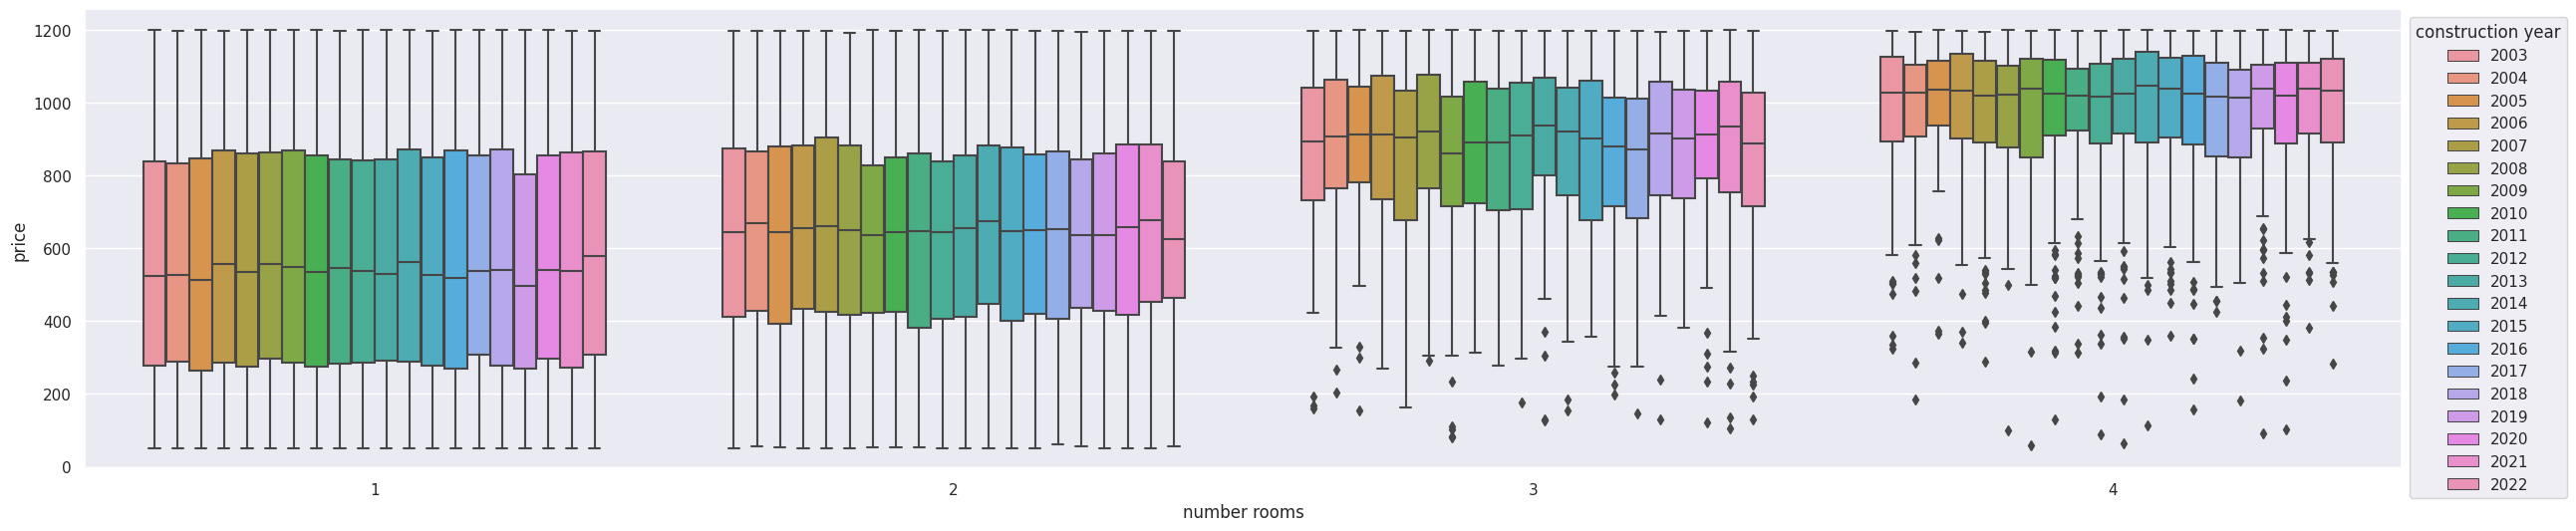

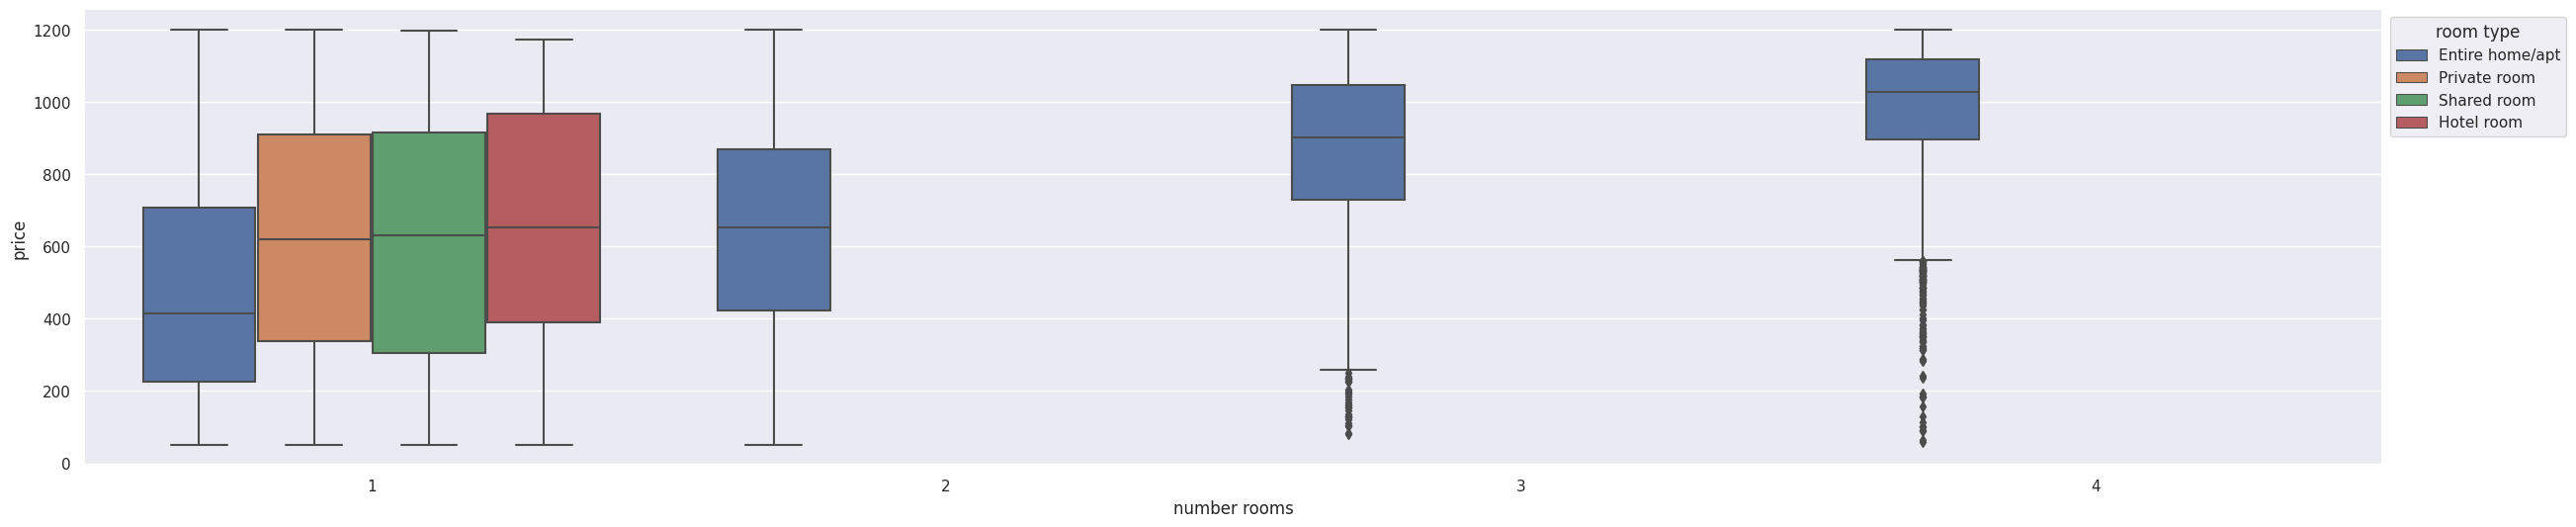

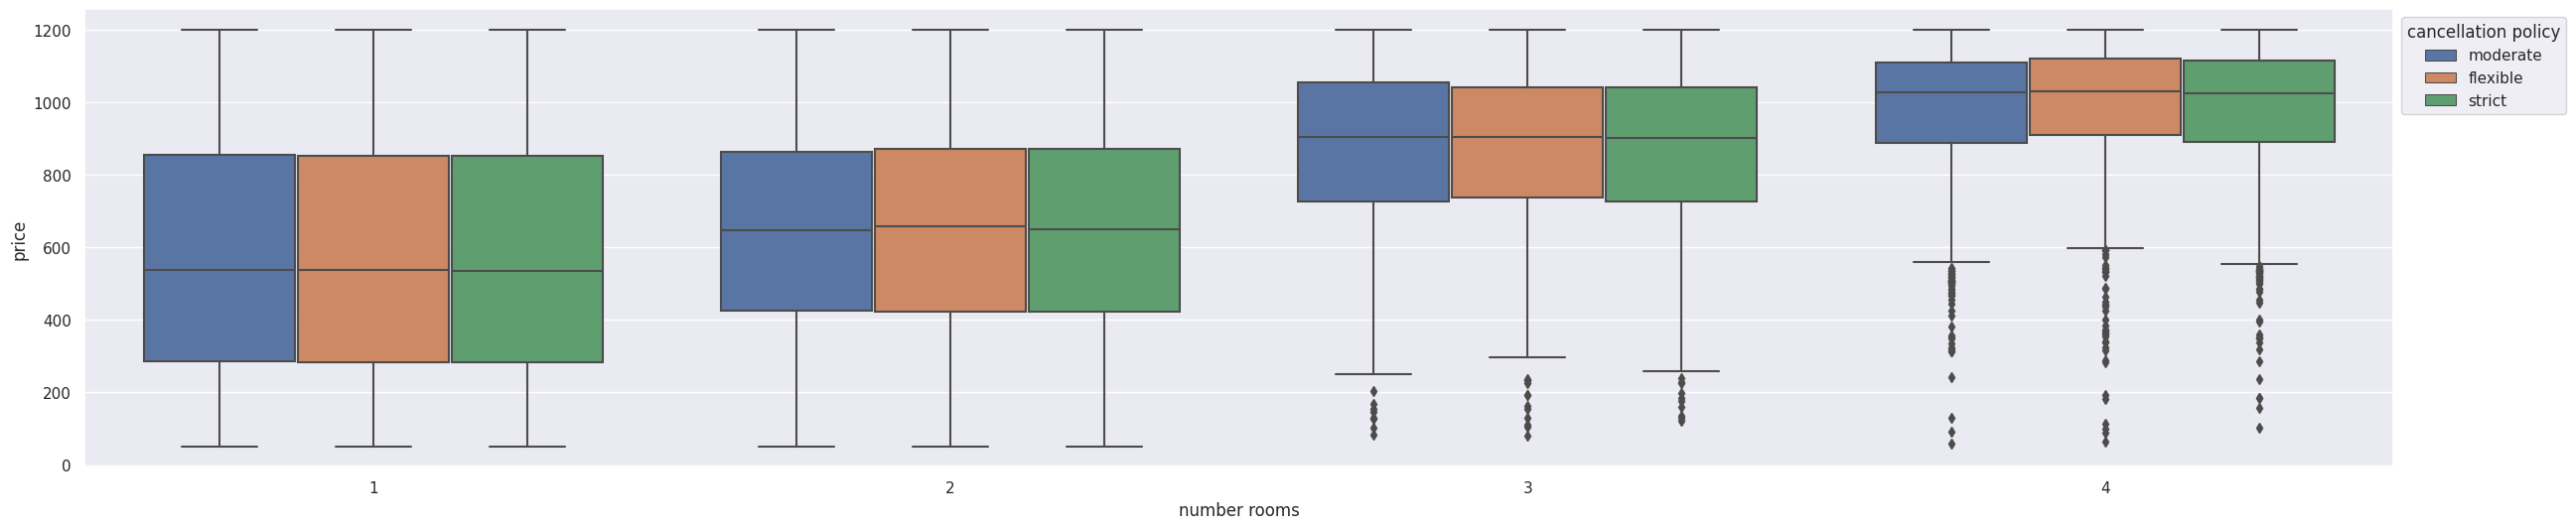

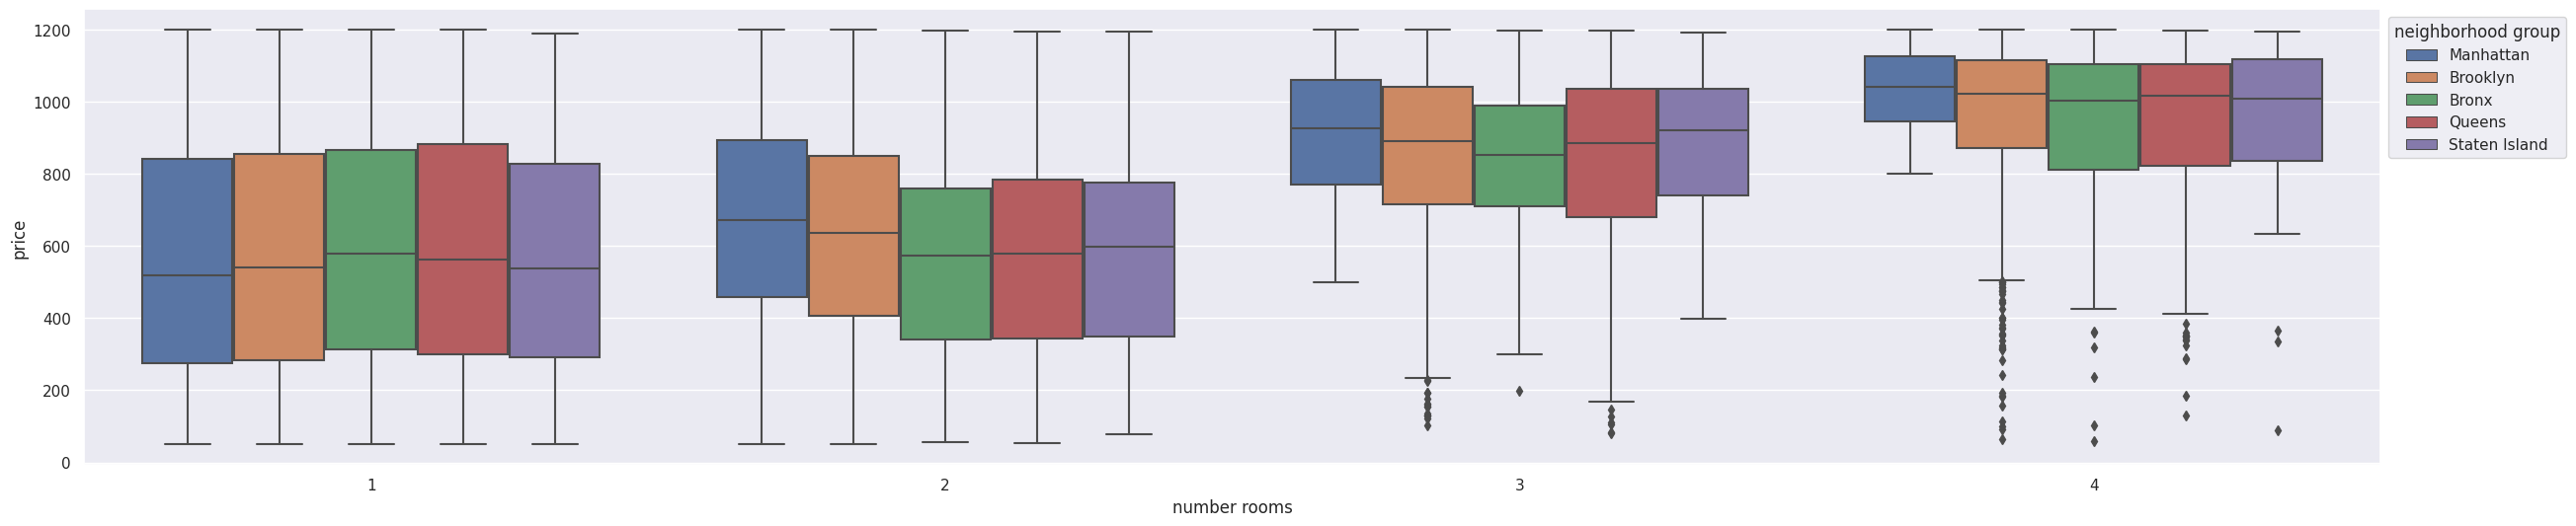

In [14]:
mvFeatures = ['construction year', 'room type', 'cancellation policy', 'neighborhood group']
sns.set(rc={'figure.figsize':(30,6)})

for i in sorted(df2['number rooms'].unique()):
  filter = (df2['number rooms']==i)
  print('#' + str(i) +' room: ' + str(df2['id'][filter].count()))

for i in mvFeatures:
  plt.figure()
  ax = sns.boxplot(x = df2['number rooms'], y = df2['price'], hue = df2[i])
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

_Answer:_

**Construction year:** *As we can see in the code box above, the quantity for each number of room group diminishes as the number of rooms increases. Also, he price range reduces and the quartiles get higher. These also leads to more outliers.*

**Room type:** *As previously stated, only one out of the four room types have more than one room. In the left graph we can recognise that private and shared room have similar quartiles and price range. Hotel rooms are presented as the most expensive option, with higher median even though the upper whisker is slightly lower than in the other option. This could be interpreted as the prices condensing in a higher range but without offers as expensive at the other number of rooms. One room apartments have in general lower quarters, which indicates more offer of less expensive apartments.*

*Looking at 2-room apartments the boxplot is relatively symetric, it could be interpreted as prices variating approximately uniformingly across the price range. In the 3-room appartments we can observe that the median is considerable higher and certain amount of outliers below the lower whisker. This behaviour accentuates for 4-room appartments with a greater median.*

**Cancellation policy:** *In every number of room case the boxplot is alike for each of the cancellation policy posibilites. Hence, it does not give meaningful information in this aspect.*

**Neighbourhood group:** *For 1 and 2-room apartment the boxplot are similar for every neighbourhood group. For 2-room apartments in Manhattan, prices tend to be a bit higher than for the other locations. This tendency can also be appreciated in 3 and 4-room apartments. The more rooms, the more outliers are found.*


#### Multivariate Analysis for Construction Year

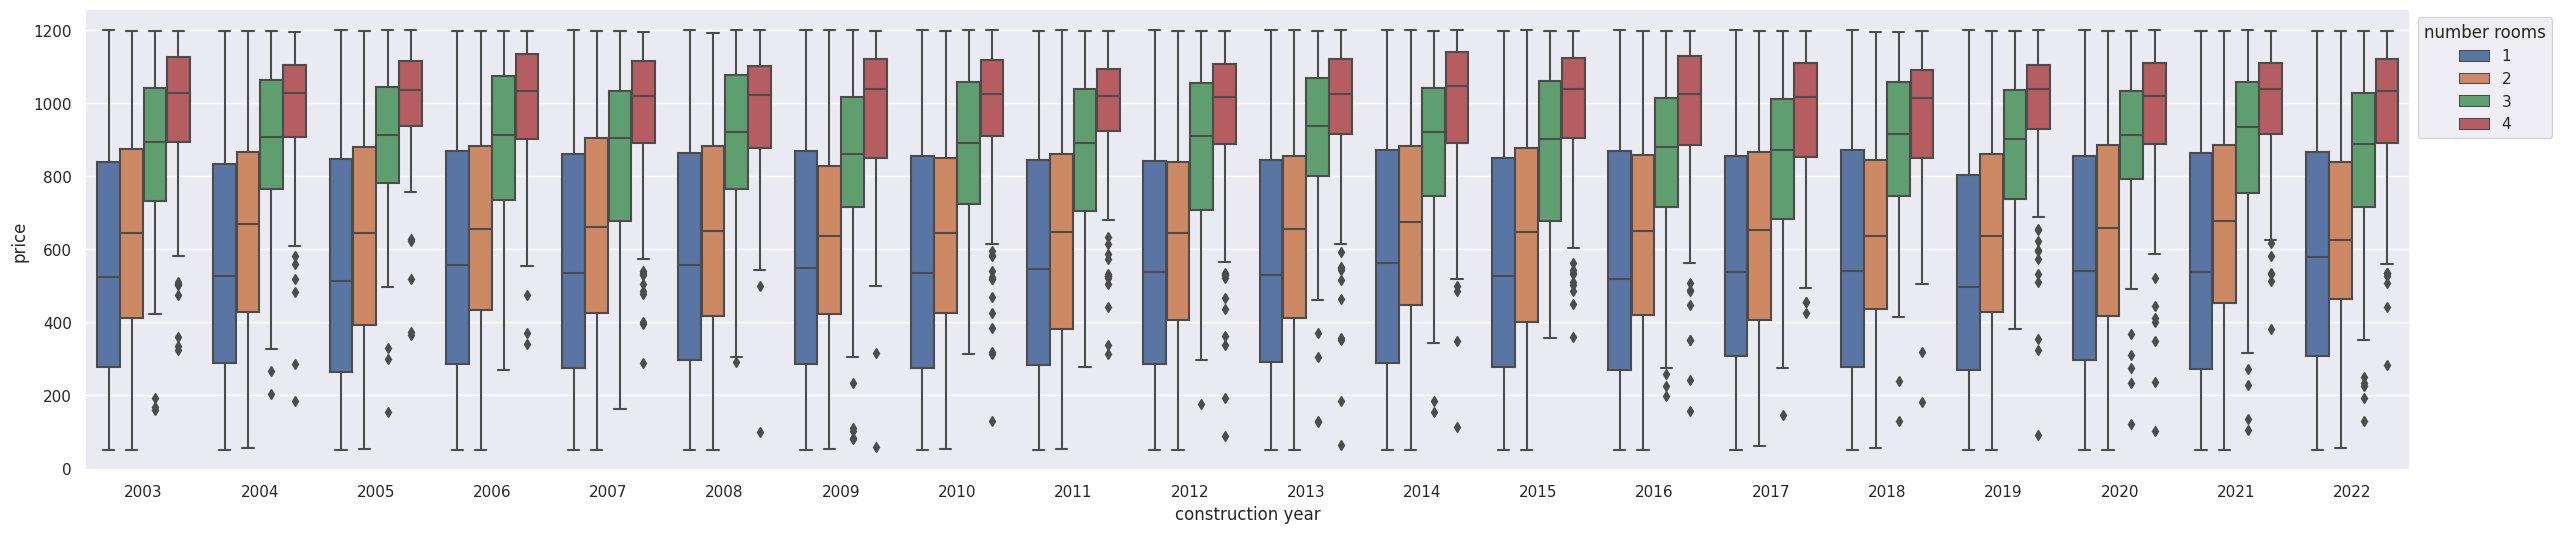

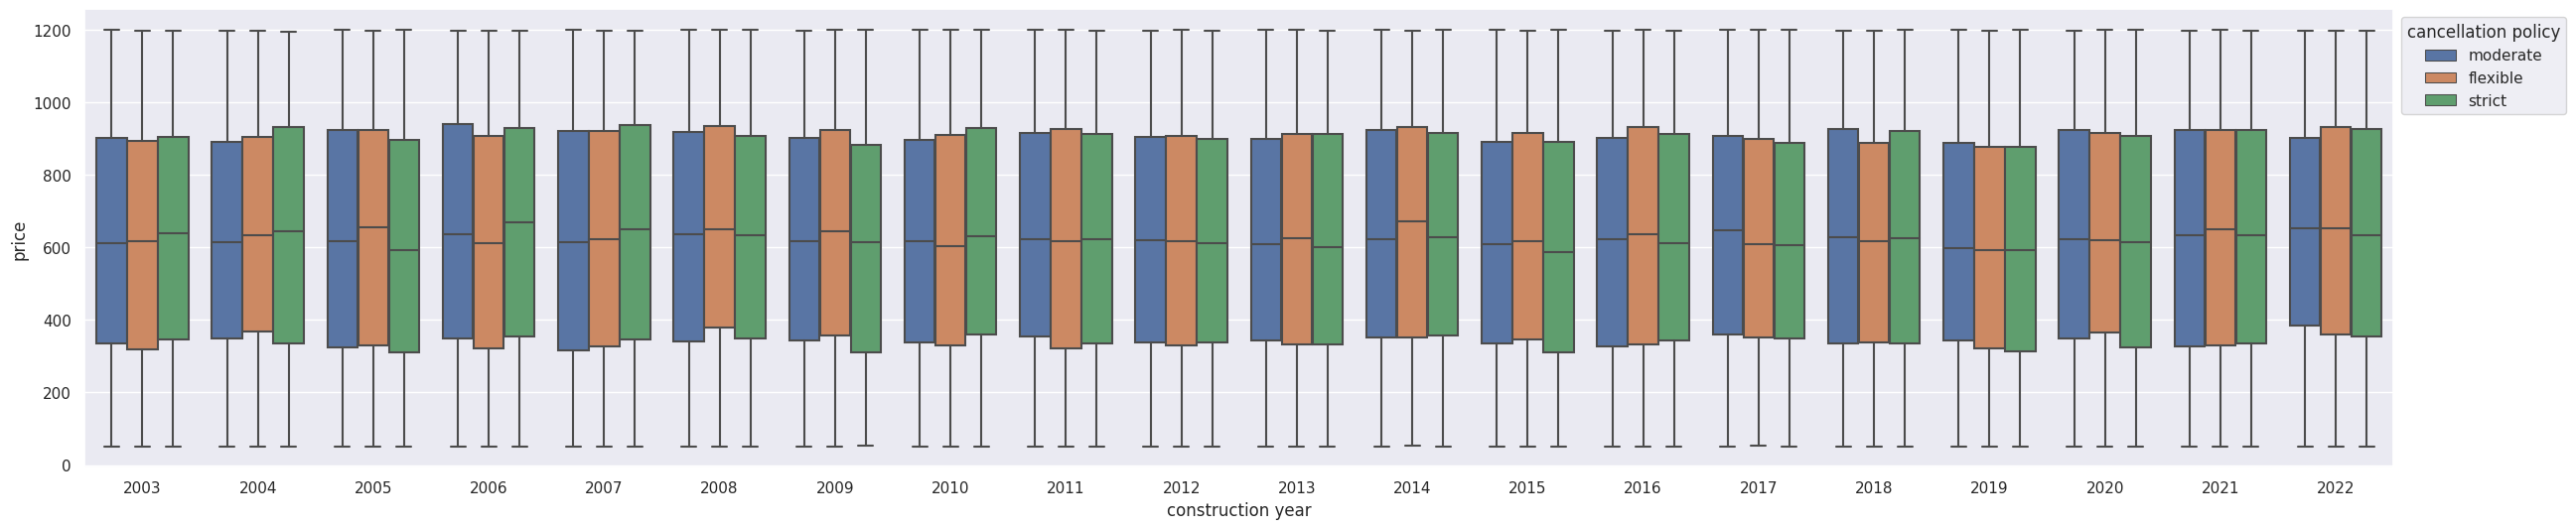

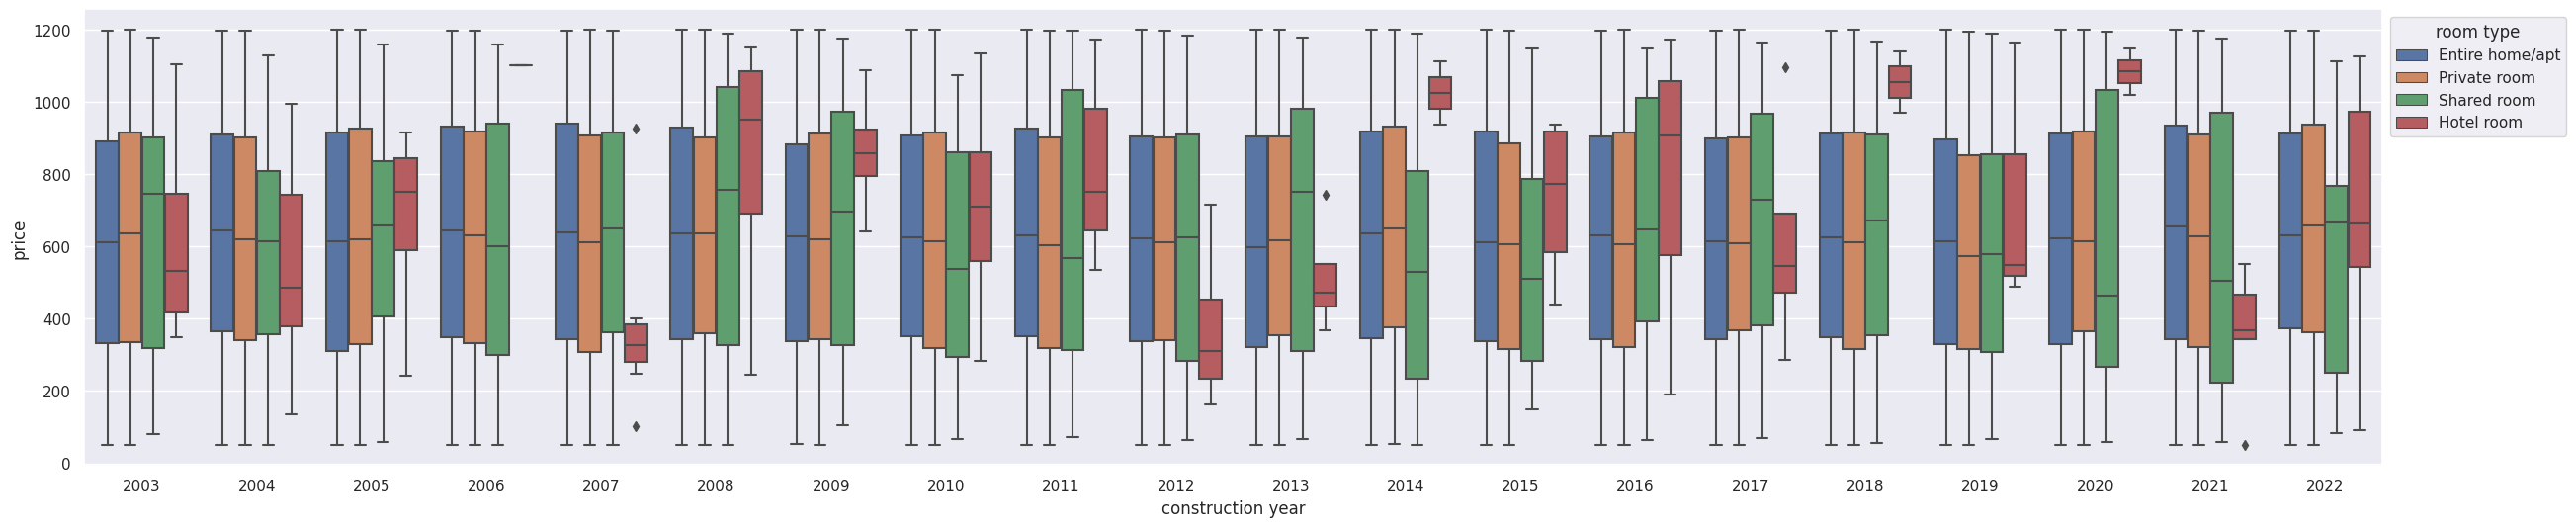

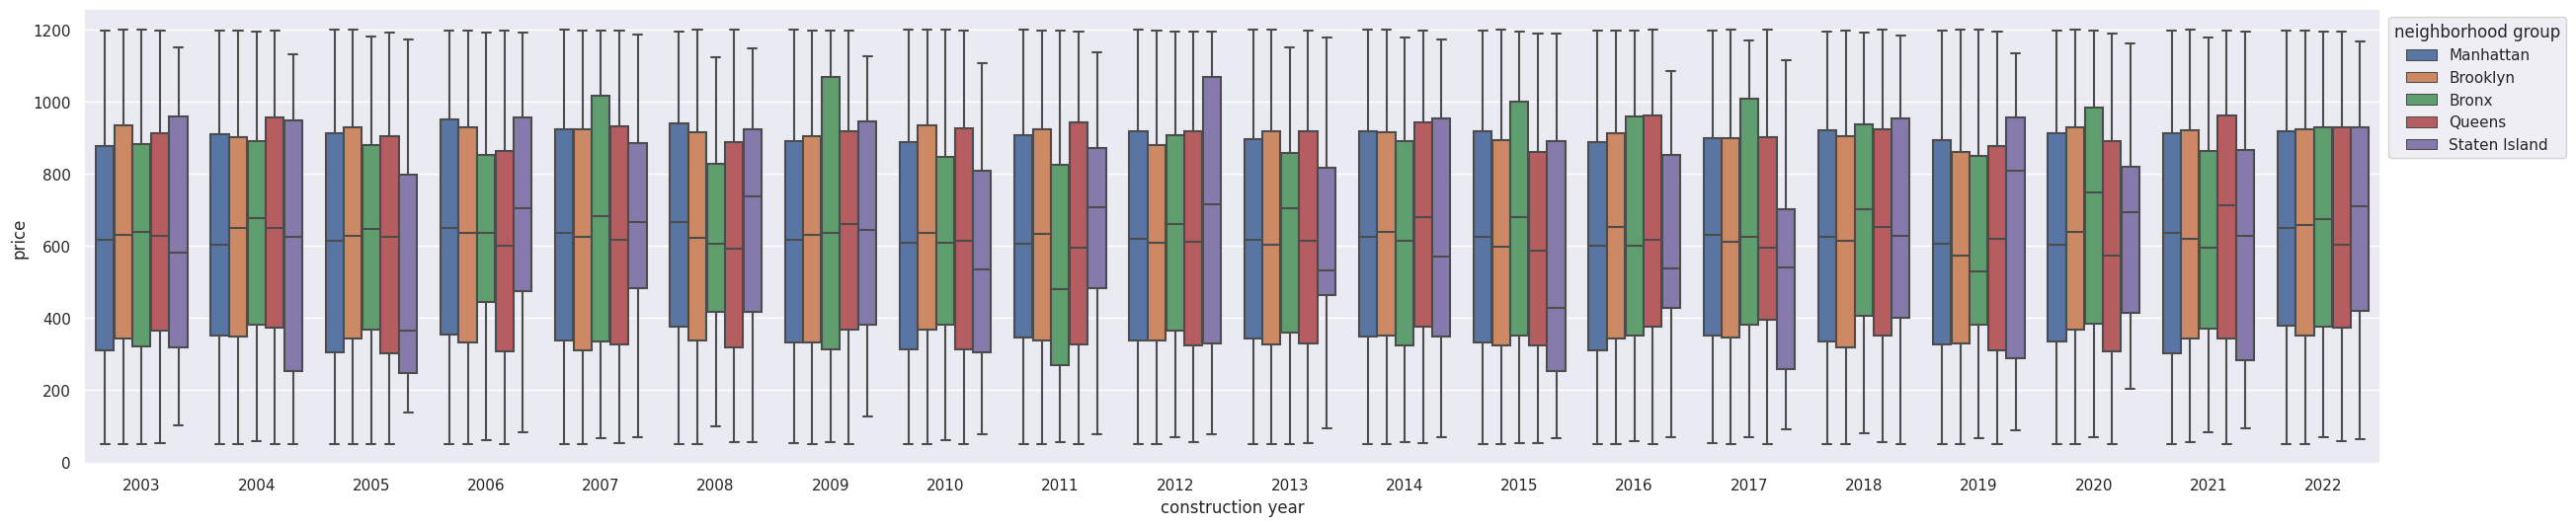

In [15]:
mvFeatures = ['number rooms', 'cancellation policy', 'room type', 'neighborhood group']

sns.set(rc={'figure.figsize':(30,6)})

for i in mvFeatures:
  plt.figure()
  ax = sns.boxplot(x = df2['construction year'], y = df2['price'], hue = df2[i])
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

del(mvFeatures,i,ax,filter)

_Answer:_

*The same patrons are approximately followed for each year for each of the four features studied. We could highlight the behaviour of the price for Hotel Rooms in the third graph, which is more volatile due to the shortage of data available (83 instances).*

### Selection of Variables

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_
*We would take into account the number of rooms and the room type primarly. The neighbourhood group is also important, having less impact than the two features mentioned. Cancellation policy does not seem to affect the pricing. Finally, we do not have enough information to take into consideration the construction year, seeing that no pattern, favorable or unfavorable year or any other carachteristics is identified.*

## Question 2: Setting the Price

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline

First, you want to set a baseline to compare against. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [50]:
# ds: data set
train_ds, test_ds = train_test_split(df2[['number rooms', 'neighborhood group', 'room type', 'price']], test_size = 0.05)

NameError: name 'df2' is not defined

## Decision Tree

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600].

In [17]:
bins = [50, 200, 400, 600, 800, 1000, 1200]
train_ds['Price_Bins'] = pd.cut(train_ds['price'], bins)
test_ds['Price_Bins'] = pd.cut(test_ds['price'], bins)

train_ds.head()

del(bins)

Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before.

In [18]:
#dfeat: descriptive features
#target: target feature

train_dfeat = train_ds[["number rooms", "room type", "neighborhood group"]].astype(str)
train_target = train_ds['Price_Bins'].astype(str)

test_dfeat = test_ds[["number rooms", "room type", "neighborhood group"]].astype(str)
test_target = test_ds['Price_Bins'].astype(str)

Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy?

Note: For this task, you must use the p_decision_tree library.

Error: no "view" mailcap rules found for type "application/pdf"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'output/visualTree.gv.pdf'


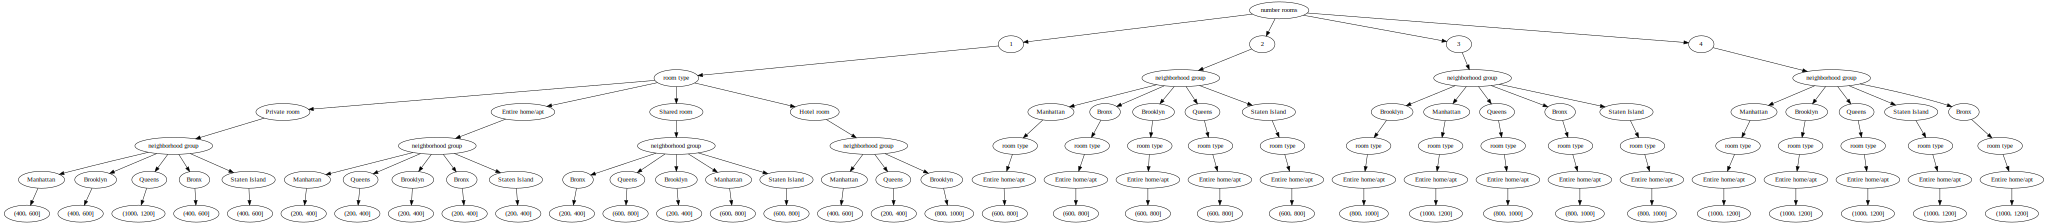

System entropy:  2.585401644616553


In [19]:
decisionTree = DecisionTree(np.array(train_dfeat).tolist(),
                            ["number rooms", "room type", "neighborhood group"],
                            np.array(train_target).tolist(),
                            "entropy")
decisionTree.id3(0,10)
dot = decisionTree.print_visualTree(render=True)

display(dot)

print("System entropy: ", format(decisionTree.entropy))

What is the first feature the decision tree splits on?

_Answer:_
*The first feature that the decision tree splits on is the number of rooms, which can be 1, 2, 3 or 4.*



Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

_Answer:_


*   Manhattan, 1-room, Private Room: price: 500
*   1-room, Shared room, staten island: 700



What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage.

In [20]:
manhattan_private_dtree = 500
staten_island_shared_dtree = 700

To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [21]:
def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, decisionTree, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<=len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]

### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)


To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above.

In [22]:
pred_bin=[None]*len(test_ds)
i=0
for index, data in test_dfeat.iterrows():
  pred_bin[i]=get_predicted_bin(data, features, predictor)
  i=i+1

test_ds['Predicted Bin']=pred_bin
display(test_ds)

del(pred_bin,index,data, i)


,number rooms,neighborhood group,room type,price,Price_Bins,Predicted Bin
26378,2,Manhattan,Entire home/apt,776,"(600, 800]","(600, 800]"
39700,3,Brooklyn,Entire home/apt,972,"(800, 1000]","(800, 1000]"
64099,1,Manhattan,Private room,94,"(50, 200]","(400, 600]"
39053,1,Brooklyn,Private room,149,"(50, 200]","(400, 600]"
1573,1,Brooklyn,Entire home/apt,201,"(200, 400]","(200, 400]"
...,...,...,...,...,...,...
29,1,Brooklyn,Private room,1133,"(1000, 1200]","(400, 600]"
1325,1,Manhattan,Private room,394,"(200, 400]","(400, 600]"
33837,3,Manhattan,Entire home/apt,872,"(800, 1000]","(1000, 1200]"
70521,4,Bronx,Entire home/apt,621,"(600, 800]","(1000, 1200]"


You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error?

In [23]:
x = test_ds['Predicted Bin'].str.split('\(|,|]',expand=True).add_prefix('Limit_')
x = pd.DataFrame(x)
test_ds['Mean Price'] = (x['Limit_1'].astype(int)+x['Limit_2'].astype(int))/2

Error = np.abs(np.mean(test_ds['Mean Price'].astype(int)-test_ds['price'].astype(int)))
print('Mean Absolute Error: '+ '$' + str(round(Error,2)))

display(test_ds)
del(x)


Mean Absolute Error: $82.01


,number rooms,neighborhood group,room type,price,Price_Bins,Predicted Bin,Mean Price
26378,2,Manhattan,Entire home/apt,776,"(600, 800]","(600, 800]",700.0
39700,3,Brooklyn,Entire home/apt,972,"(800, 1000]","(800, 1000]",900.0
64099,1,Manhattan,Private room,94,"(50, 200]","(400, 600]",500.0
39053,1,Brooklyn,Private room,149,"(50, 200]","(400, 600]",500.0
1573,1,Brooklyn,Entire home/apt,201,"(200, 400]","(200, 400]",300.0
...,...,...,...,...,...,...,...
29,1,Brooklyn,Private room,1133,"(1000, 1200]","(400, 600]",500.0
1325,1,Manhattan,Private room,394,"(200, 400]","(400, 600]",500.0
33837,3,Manhattan,Entire home/apt,872,"(800, 1000]","(1000, 1200]",1100.0
70521,4,Bronx,Entire home/apt,621,"(600, 800]","(1000, 1200]",1100.0


In [24]:
del(features,decisionTree,dot,predictor,Error)
del(test_dfeat,test_target,train_dfeat,train_target)

## Clustering

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding 

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [25]:
# The feature columns are all categorical columns, so one-hot encoding is 
# applied to all of them.

enc = OneHotEncoder()
train_clustering = train_ds[['number rooms', 'neighborhood group', 'room type', 'price']]
clustering_array = np.array(train_clustering[['number rooms', 'neighborhood group', 'room type']]).tolist()

enc.fit(clustering_array)

clustering_array_ohe = enc.transform(clustering_array).toarray()
del(train_ds)

### Choosing number of clusters

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

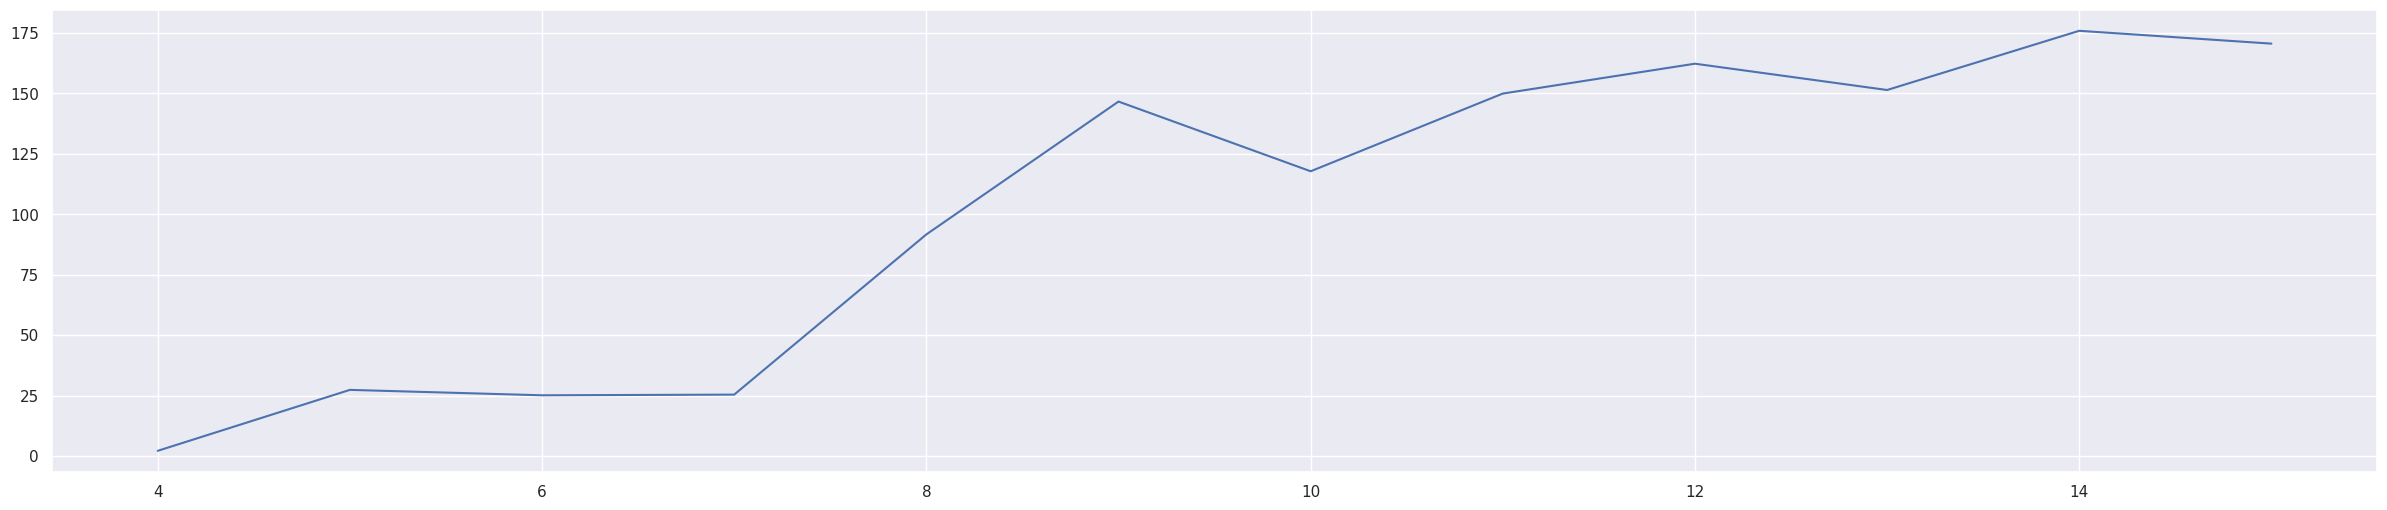

In [26]:
plt.figure()
std = []

for k in range(4, 16):
  kmeans = KMeans(k)
  clusters = kmeans.fit_predict(clustering_array_ohe)
  mean = []
  for i in range(k):
    positions_cluster = (clusters == i)
    prices_of_cluster = train_clustering['price'].loc[positions_cluster].values.tolist()
    mean.append(np.mean(prices_of_cluster))

  std.append(np.std(mean))

plt.plot(range(4,16), std)

del(positions_cluster,kmeans,clusters,std,k,i,mean)

_Answer:_ *The aim when selecting the optimum number of clusters is the minimum number of clusters at which the standard deviation stabilises.*



**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [27]:
# Define your apartment features
your_apartment = [2, 'Manhattan', 'Entire home/apt']

# Determine whether the apartment is in the training dataset and get the row index.
if your_apartment in clustering_array:
  position_your_apartment = clustering_array.index(your_apartment)

# Initialising variables
k = 9

# Create Kmeans clustering algorithms
k_means_9 = KMeans(k)

# Train the kmeans with the training dataset and predict the centroids each point
# corresponds to
clusters_9 = k_means_9.fit_predict(clustering_array_ohe).tolist()

# Add an additional column to the dataset, representing the cluster index each
# instance belongs to.
train_clustering['cluster_number'] = clusters_9

# Number of the cluster of your apartment
cluster_your_apartment_9 =clusters_9[position_your_apartment]

# Calculating the mean price for each cluster
price_mean_each_cluster = {}

for j in range(k):
  index_cluster_your_apartment = [i for i, x in enumerate(clusters_9) if x == j]
  prices_of_cluster = train_clustering['price'].iloc[index_cluster_your_apartment].values.tolist()
  price_mean_each_cluster[str(j)] = np.mean(prices_of_cluster)

# Insert clustering price to your apartment array
your_apartment.append(price_mean_each_cluster[str(cluster_your_apartment_9)])

# Display information
print('Your apartment is located in cluster: ' + str(cluster_your_apartment_9))
print('Mean value of the cluster: ' + str(price_mean_each_cluster[str(cluster_your_apartment_9)]))



# Prediction of cluster for profit discrepancies calculation
apartments = [[1, 'Manhattan', 'Private room'],[1, 'Staten Island', 'Shared room']]
cluster_apartment_1 = k_means_9.predict(enc.transform(apartments))

manhattan_private_clust = price_mean_each_cluster[str(cluster_apartment_1[0])]
staten_island_shared_clust = price_mean_each_cluster[str(cluster_apartment_1[1])]

del(apartments,cluster_apartment_1,cluster_your_apartment_9,prices_of_cluster,index_cluster_your_apartment,j,clusters_9)
del(clustering_array,clustering_array_ohe,position_your_apartment,enc)

Your apartment is located in cluster: 1
Mean value of the cluster: 718.8348045397225


### Evaluating clustering

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [28]:
#Preprocessing numerical
full_data = train_clustering[['number rooms', 'neighborhood group', 'room type']] # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]
del(embedding,intersection,fit1,fit2,categorical_weight,categorical,numerical,full_data,pt)

/opt/conda/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result.

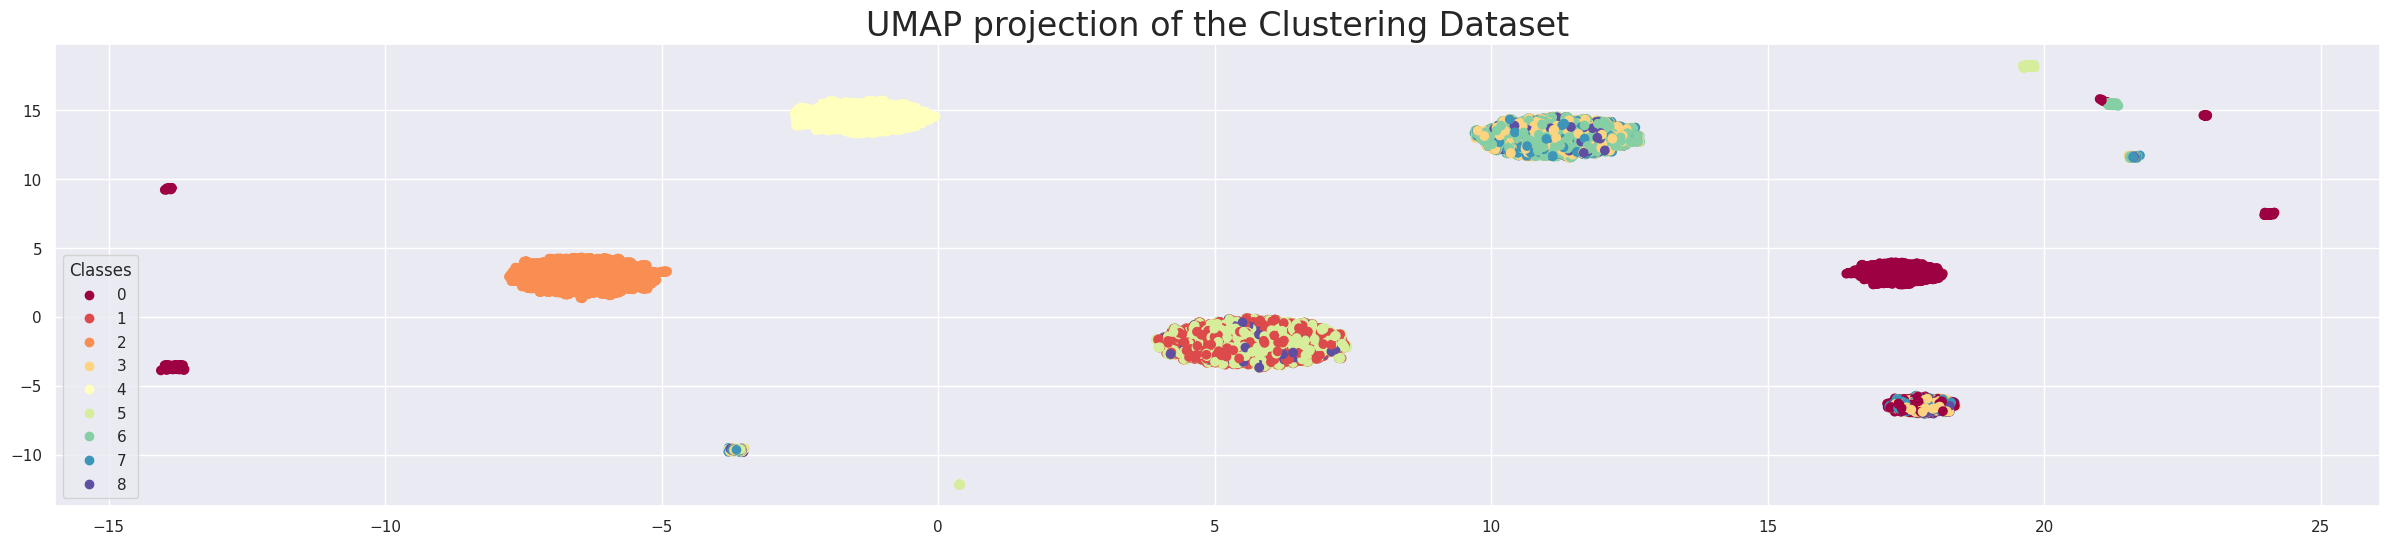

In [29]:
plt.figure()
scatter = plt.scatter(
    dimension1,
    dimension2,
    c=train_clustering['cluster_number'], cmap='Spectral')

legend = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")

plt.title('UMAP projection of the Clustering Dataset', fontsize=24);
del(legend,c,dimension1,dimension2,scatter,train_clustering)

_Answer:_

*The purpose of Uniform Manifold Approximation and Projection is to reduce the dimension of the clustering algorithm into 2D to better visualise the clusters created. The clusters created mainly follow a circular shape, so KMeans algorithm is very well fit to this kind of data. It must be noted that there are two clear kinds of circular clusters. One that contains only one kind of class, such as the cluster created by class 1 and 3. The other type of circular shape contains more than one class cluster. In higher dimensions, these create very distict clusters, however, when reduced to lower dimensions they appear to collide with each other.*

*A disadvantage of the KMean algorithm is that it is not able to detect anomalies in the dataset and instead assigns them to the nearest cluster. This can be clearly seen in the above projection, as there is an isolated datapoint associated to Class 5 even though it is far away from the main cluster. This in post-processing could be labelled as an anomaly.*




We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices.

In [30]:
# Define test dataset
test_clustering = test_ds[['number rooms', 'neighborhood group', 'room type', 'price']]

# Pre-processing test dataset to fit into Kmeans predict method.
clustering_array_test = np.array(test_clustering[['number rooms', 'neighborhood group', 'room type']]).tolist()
enc2 = OneHotEncoder()
enc2.fit(clustering_array_test)
clustering_array_test_ohe = enc2.transform(clustering_array_test).toarray()
clusters_predict = k_means_9.predict(clustering_array_test_ohe)

# Define a new column with the predicted cluster number
test_clustering['cluster_number'] = clusters_predict.astype(str)

# Define a new column with the mean price corresponding to each cluster
test_clustering['predicted_price'] = test_clustering['cluster_number'].map(price_mean_each_cluster)
display(test_clustering)
# Calculating Mean Absolute Error
mae = np.mean(np.abs(test_clustering['price'].to_numpy() - test_clustering['predicted_price'].to_numpy()))
print('The Mean Absolure Error is: ' + str(mae))
del(mae,test_clustering,price_mean_each_cluster,clusters_predict,k_means_9,clustering_array_test_ohe,enc2,clustering_array_test,k)
del(df2,test_ds)

/tmp/ipykernel_1072/1189252219.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clustering['cluster_number'] = clusters_predict.astype(str)
/tmp/ipykernel_1072/1189252219.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clustering['predicted_price'] = test_clustering['cluster_number'].map(price_mean_each_cluster)


,number rooms,neighborhood group,room type,price,cluster_number,predicted_price
26378,2,Manhattan,Entire home/apt,776,1,718.834805
39700,3,Brooklyn,Entire home/apt,972,7,864.399562
64099,1,Manhattan,Private room,94,4,620.750889
39053,1,Brooklyn,Private room,149,2,624.143645
1573,1,Brooklyn,Entire home/apt,201,6,480.868050
...,...,...,...,...,...,...
29,1,Brooklyn,Private room,1133,2,624.143645
1325,1,Manhattan,Private room,394,4,620.750889
33837,3,Manhattan,Entire home/apt,872,1,718.834805
70521,4,Bronx,Entire home/apt,621,8,979.624378


The Mean Absolure Error is: 264.1283599979956


### Final comments on the price prediction

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?


_Answer:_

*The three approaches that were used to determine the price were Decision Trees, the unsupervised learning clustering algorithm K-means and …
In Decision Trees, an accurate price for each instance is not predicted. Instead each instance is classified into a price range, and then the median of that price range is selected for the price prediction. This will lead to a very high Mean Absolute Errors. The MAE is approximately the deviation between the Mean Price and the limits of the price bin.*

*Therefore, it would be interested in a further analysis to see the influence of bin range on the final prediction, by varying the size of the uniformly split bins (all uniform except the first bin) or even including non-uniform bins. The advantage of using non-uniform bins is that it could be used to better classify underrepresented and overrepresented data. As currently, in a certain price range, if there is a subset of the price range with a higher instance frequency it will dominate the price prediction. The information displayed on the previously calculated histogram, showing frequency vs price bin for a specific number of bins could be used for this purpose. However, one of the disadvantages of using very small bin ranges is that the Decision Tree will become very shallow and very wide, leading to higher variance and it could be prone to overfitting. Additionally, it could be more difficult to visualise in a graph.*

*This limitation was overcome on the clustering analysis, where the effect of the number of clusters on the standard deviation was analysed. 
The features used to make the predictions are categorical. Meaning that the divisions will represent each category and the leaf nodes will be all the classes associated to that category, so the Decision Tree resulting from this analysis will always be a shallow tree with 3 partitions (one corresponding to each feature).*
*The classification criteria used in this Decision Tree is the entropy. AÑADIR
One of the main advantages of using Decision Trees is that the data is highly interpretable, you can easily see which variable is split and how.* 

*Clustering on the other hand, is an unsupervised clustering algorithm, that aims to group a series of instances or observations into a number of predefined clusters. The objective is to maximise the distances within the centroids and minimise the distance between the instances and their respective centroids.*

*Initially, a study of the effect of the number of clusters on the standard deviation is carried out, to ensure that we choose the optimum number of clusters. This optimum, as previously explained, is the minimum number of clusters where the standard deviation stops varying greatly as the number of clusters increases. This can be seen in the previous graph, as the first point of the flattened curve.*

*The price prediction corresponding to an apartment is the mean of the prices of the cluster it has been assigned to. The resulting MAE is very high, even higher than for the Decision Tree. This means that the datapoint distribution is not fit for K-means clustering. This can be due to the fact that in reality the clusters have varying size, different densities or even non-spherical shapes so many datapoints will be incorrectly labelled.  
An additional disadvantage of K-means algorithm is that it does not detect outliers, so they will be assigned to a specific cluster and will affect the mean price estimation.*

*The algorithm converges to a solution, but it is not the globally optimal solution because K-means is very sensitive to centroid initialisation. If we run the K-means algorithm multiple times, the mean of the cluster for your apartment will change slightly, due to its dependency on cluster initialisation.*



## Question 3: Investigating Price Elasticity

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice.

,id,number rooms,room type,neighborhood group,price,utilization
0,1002102,1,Entire home/apt,Manhattan,142,305.263673
1,1002403,1,Private room,Manhattan,620,86.294663
2,1002755,2,Entire home/apt,Brooklyn,368,129.287482
3,1003689,1,Entire home/apt,Manhattan,204,206.579601
4,1004650,1,Private room,Brooklyn,71,361.000000
...,...,...,...,...,...,...
70837,57353610,1,Private room,Queens,103,256.254940
70838,57358028,1,Private room,Queens,982,53.849882
70839,57358580,1,Private room,Queens,946,59.483494
70840,57359685,3,Entire home/apt,Manhattan,1043,128.349359


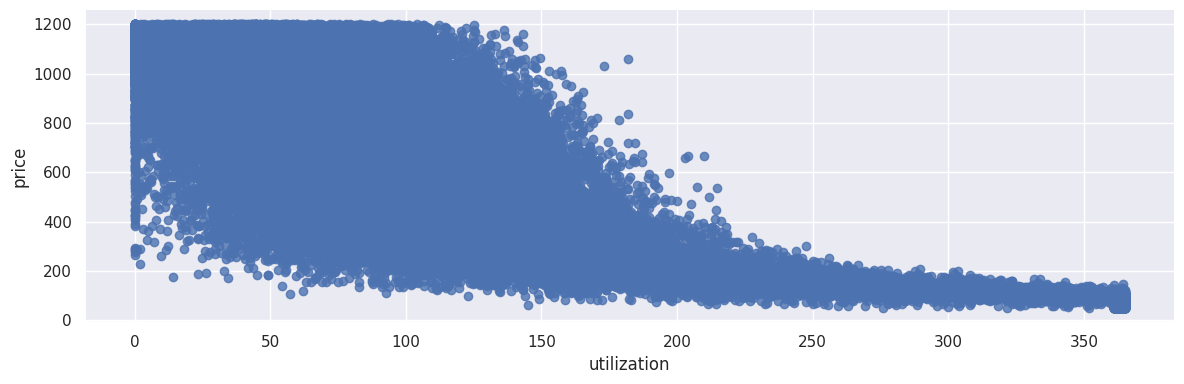

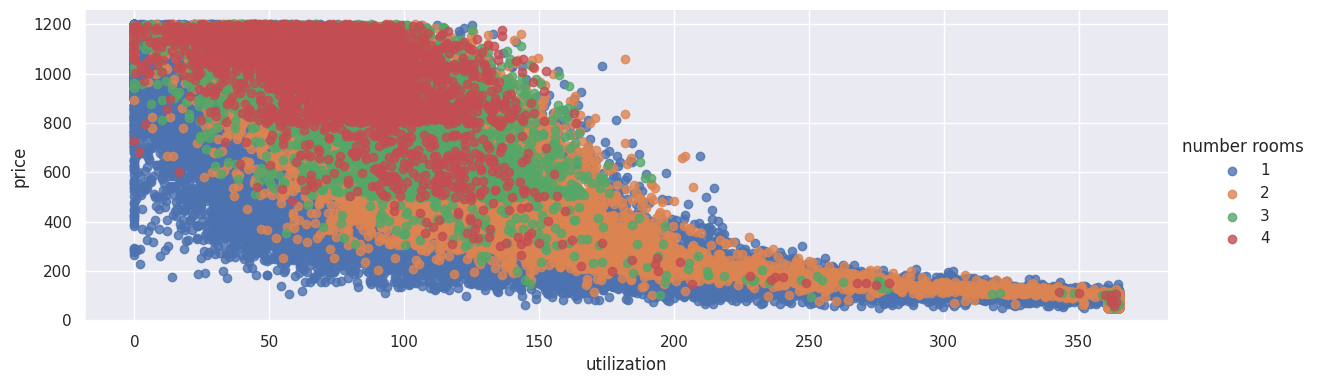

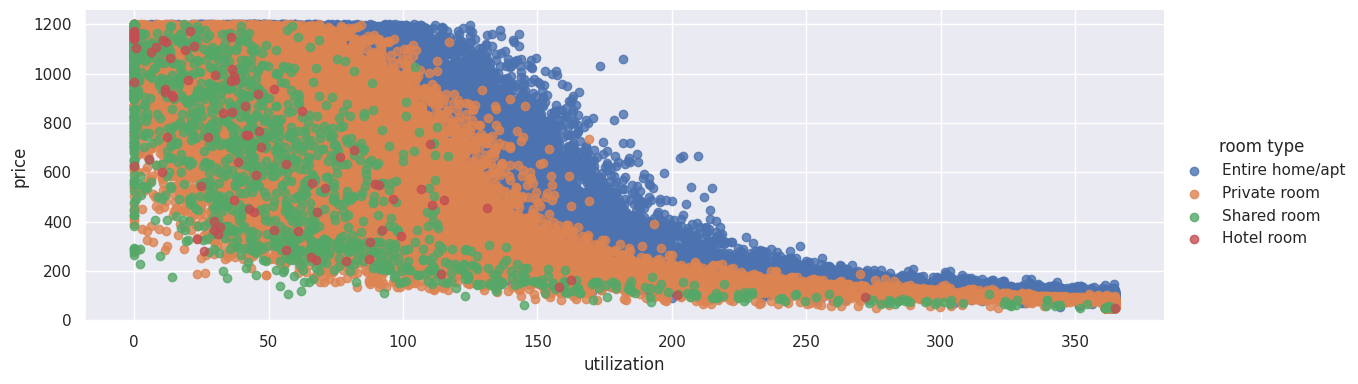

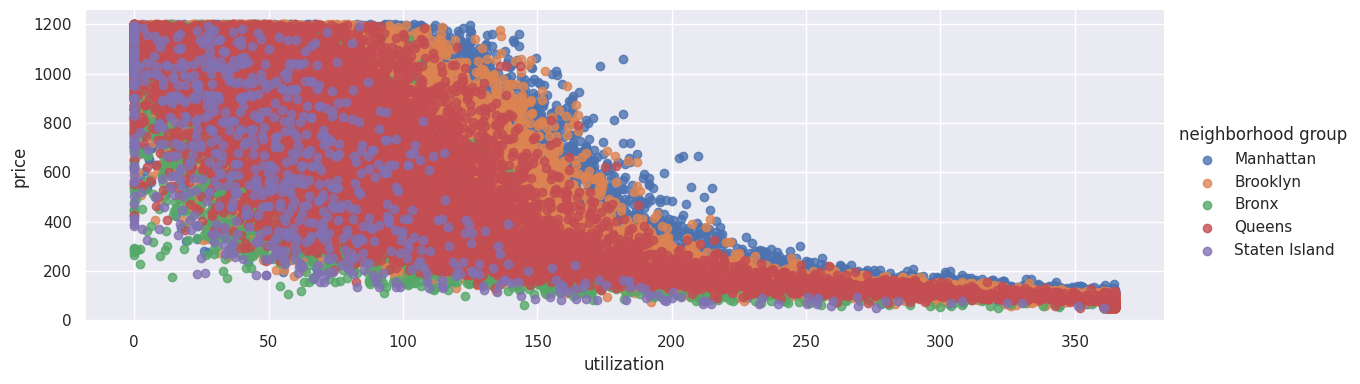

In [31]:
df3 = pd.read_csv('AirBnB_utilization.csv')
display(df3)

sns.set(rc={"figure.figsize":(8, 3)})
sns.lmplot(x='utilization', y='price',data=df3, height=4, aspect=3, fit_reg=False)

sns.lmplot(x='utilization', y='price', data=df3, height=4, aspect=3, hue='number rooms', fit_reg=False)
sns.lmplot(x='utilization', y='price', data=df3, height=4, aspect=3, hue='room type', fit_reg=False)
sns.lmplot(x='utilization', y='price', data=df3, height=4, aspect=3, hue='neighborhood group', fit_reg=False)

You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

Prepare the data set by splitting, one-hot encoding, and normalizing.

In [32]:
# Split training and test dataset
train_ds3, test_ds3 = train_test_split(df3[['number rooms', 'neighborhood group','price', 'room type', 'utilization']], test_size = 0.05)

# Use One Hot Encoding in categorical data, i.e. features neighborhood group, room type and number of rooms. 
enc3 = OneHotEncoder()
enc3.fit(np.array(train_ds3[['number rooms', 'neighborhood group', 'room type']]).tolist())
train_ds3_ohe = enc3.transform(np.array(train_ds3[['number rooms', 'neighborhood group', 'room type']]).tolist()).toarray()

# Normalise numerical data
def NormalizeData(data, train_max, train_min):
  return (data - train_min) / (train_max - train_min)

del(train_ds3_ohe)

In [33]:
encoder_num_rooms = LabelEncoder()
encoder_neigh_group = LabelEncoder()
encoder_room_type = LabelEncoder()

train_ds3_LE = train_ds3[['number rooms']].apply(encoder_num_rooms.fit_transform)
train_ds3_LE[['neighborhood group']] = train_ds3[['neighborhood group']].apply(encoder_neigh_group.fit_transform)
train_ds3_LE[['room type']] = train_ds3[['room type']].apply(encoder_room_type.fit_transform)

train_ds3_dfeat = train_ds3_LE.copy()
train_price_max = np.max(train_ds3['price'])
train_price_min = np.min(train_ds3['price'])

train_ds3_dfeat['normalised price'] = NormalizeData(train_ds3['price'], train_price_max, train_price_min)

test_ds3_LE = test_ds3[['number rooms']].apply(encoder_num_rooms.transform)
test_ds3_LE[['neighborhood group']] = test_ds3[['neighborhood group']].apply(encoder_neigh_group.transform)
test_ds3_LE[['room type']] = test_ds3[['room type']].apply(encoder_room_type.transform)

test_ds3_dfeat = test_ds3_LE.copy()
test_ds3_dfeat['normalised price'] = NormalizeData(test_ds3['price'], train_price_max, train_price_min)
del(enc3,train_ds3_LE,test_ds3_LE)

For each technique, use 5-cross-fold validation and assess the performance on the test set. 

#### Regression

Learn a linear regression to predict the utilization of an AirBnB.

In [34]:
#The sklearn package provides the data splitted into a set of descriptive features and a target feature.
#We can easily transform this format into the pandas data frame as used above.
train_lr = train_ds3_dfeat.copy()
train_lr['target'] = train_ds3['utilization']
train_lr_dfeat = train_ds3_dfeat[['number rooms', 'neighborhood group', 'normalised price', 'room type']]
train_lr_target = train_ds3['utilization']

test_lr = test_ds3_dfeat.copy()
test_lr['target'] = test_ds3['utilization']
test_lr_dfeat = test_ds3_dfeat[['number rooms', 'neighborhood group', 'normalised price', 'room type']]

param_grid = {}  
grid = GridSearchCV(LinearRegression(), param_grid, cv = None, verbose = 3) 
grid.fit(train_lr_dfeat, train_lr_target)

train_lr['prediction'] = grid.predict(train_lr_dfeat)
test_lr['prediction'] = grid.predict(test_lr_dfeat)

display(train_lr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.643 total time=   0.0s
[CV 2/5] END ..................................., score=0.645 total time=   0.0s
[CV 3/5] END ..................................., score=0.640 total time=   0.0s
[CV 4/5] END ..................................., score=0.642 total time=   0.0s
[CV 5/5] END ..................................., score=0.639 total time=   0.0s


,number rooms,neighborhood group,room type,normalised price,target,prediction
6627,1,2,0,0.362609,105.765754,163.373358
31131,0,1,0,0.777391,91.306801,71.803268
64823,0,1,0,0.534783,120.592497,123.797988
10206,0,2,2,0.723478,38.111607,46.251921
14726,0,2,2,0.644348,83.864034,63.210773
...,...,...,...,...,...,...
68733,0,1,0,0.188696,131.015332,197.969667
18262,0,2,0,0.447826,133.631587,144.114206
11527,0,1,2,0.398261,82.980456,114.270819
65394,3,2,0,0.806087,97.564186,70.320794


What is the mean absolute error achieved on the test data?

In [35]:
lr_mae = 1/len(test_lr)*sum(abs(test_lr['prediction']-test_lr['target']))
print('The mean absolute error achieved on the test data is: ' + str(round(lr_mae,3)))

The mean absolute error achieved on the test data is: 34.978


Show (draw!) the price elasticity for your apartment. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


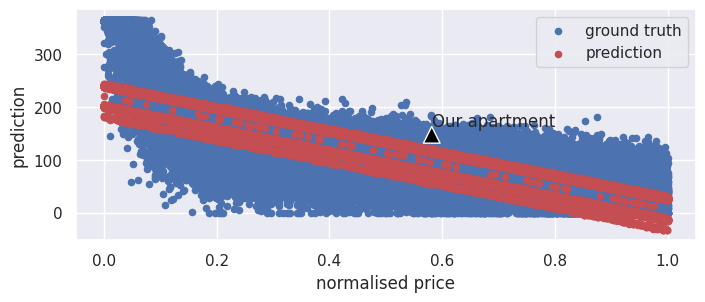

In [36]:
# your_apartment = [2, 'Manhattan', 'Entire home/apt']

normal_price = NormalizeData([your_apartment[3]], train_price_max, train_price_min)

# # ON THE TRAIN SET

our_utilisation = train_lr.iat[0,5]
ax = train_lr.plot(x='normalised price',y='target', kind= "scatter", label = "ground truth")
train_lr.plot(x='normalised price',y="prediction", kind= "scatter", ax = ax, color = "r", label = "prediction")
ax.annotate('Our apartment', (normal_price, our_utilisation), arrowprops=dict(facecolor='black', shrink=0.05))

del(train_lr,train_lr_dfeat,train_lr_target,test_lr,test_lr_dfeat,lr_mae,grid,param_grid)
del(our_utilisation,ax)

#### Linear SVR

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [37]:
train_svr = train_ds3_dfeat.copy()
train_svr['target'] = train_ds3['utilization']
train_svr_dfeat = train_ds3_dfeat[['number rooms', 'neighborhood group', 'normalised price', 'room type']]
train_svr_target = train_ds3['utilization']

test_svr = test_ds3_dfeat.copy()
test_svr['target'] = test_ds3['utilization']
test_svr_dfeat = test_ds3_dfeat[['number rooms', 'neighborhood group', 'normalised price', 'room type']]

# cv = None implies the application of 5-cross fold validation
param_grid = {}
grid = GridSearchCV(LinearSVR(), param_grid, cv = None, verbose = 3) 
grid.fit(train_svr_dfeat, train_svr_target)

train_svr["prediction"] = grid.predict(train_svr_dfeat)
display(train_svr)

test_svr['prediction'] = grid.predict(test_svr_dfeat)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.591 total time=   0.1s
[CV 2/5] END ..................................., score=0.595 total time=   0.1s
[CV 3/5] END ..................................., score=0.589 total time=   0.1s
[CV 4/5] END ..................................., score=0.593 total time=   0.1s
[CV 5/5] END ..................................., score=0.592 total time=   0.2s


,number rooms,neighborhood group,room type,normalised price,target,prediction
6627,1,2,0,0.362609,105.765754,145.520009
31131,0,1,0,0.777391,91.306801,78.834298
64823,0,1,0,0.534783,120.592497,117.503146
10206,0,2,2,0.723478,38.111607,49.998896
14726,0,2,2,0.644348,83.864034,62.611316
...,...,...,...,...,...,...
68733,0,1,0,0.188696,131.015332,172.665159
18262,0,2,0,0.447826,133.631587,132.606769
11527,0,1,2,0.398261,82.980456,100.590736
65394,3,2,0,0.806087,97.564186,73.496286


What is the mean absolute error achieved on the test data?

In [38]:
svr_mae = 1/len(test_svr)*sum(abs(test_svr['prediction']-test_svr['target']))
print('The mean absolute error achieved on the test data is: ' + str(round(svr_mae,3)))

The mean absolute error achieved on the test data is: 32.795


Show (draw!) the price elasticity for your apartment. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


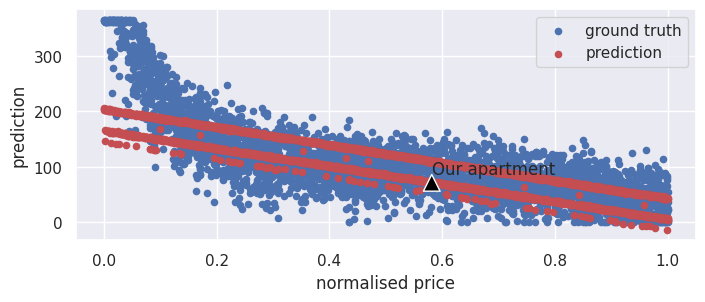

In [39]:
our_utilisation = test_svr.iat[0,5]
ax = test_svr.plot(x='normalised price',y='target', kind= "scatter", label = "ground truth")
test_svr.plot(x='normalised price',y="prediction", kind= "scatter", ax = ax, color = "r", label = "prediction")
ax.annotate('Our apartment', (normal_price, our_utilisation), arrowprops=dict(facecolor='black', shrink=0.05))

del(train_svr,train_svr_dfeat,train_svr_target,test_svr,test_svr_dfeat,svr_mae,grid,param_grid)
del(our_utilisation,ax)

#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [40]:
train_ker = train_ds3_dfeat.copy()
train_ker['target'] = train_ds3['utilization']
train_ker_target = train_ds3['utilization']

test_ker = test_ds3_dfeat.copy()
test_ker['target'] = test_ds3['utilization']
test_ker_dfeat = test_ds3_dfeat[['number rooms', 'neighborhood group', 'normalised price', 'room type']]

# Definition of polynomial kernel to be applied to augment the price features.
poly = PolynomialFeatures(2)

# Map the price into a nonlinear higher-dimensional space of order 2
transformed_price = poly.fit_transform(poly.fit_transform((train_ker['normalised price'].to_numpy()).reshape(-1, 1)))

# Perform Linear Regression
param_grid = {}
grid = GridSearchCV(LinearRegression(),param_grid, verbose = 3) 
grid.fit(transformed_price, train_ker_target)
print(grid.best_params_) 
train_ker['prediction'] = grid.predict(transformed_price)
display(train_ker)

test_ker['prediction'] = grid.predict(poly.fit_transform(poly.fit_transform((test_ker['normalised price'].to_numpy()).reshape(-1, 1))))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.825 total time=   0.0s
[CV 2/5] END ..................................., score=0.819 total time=   0.1s
[CV 3/5] END ..................................., score=0.825 total time=   0.1s
[CV 4/5] END ..................................., score=0.822 total time=   0.1s
[CV 5/5] END ..................................., score=0.815 total time=   0.0s
{}


,number rooms,neighborhood group,room type,normalised price,target,prediction
6627,1,2,0,0.362609,105.765754,99.851980
31131,0,1,0,0.777391,91.306801,65.779422
64823,0,1,0,0.534783,120.592497,92.799900
10206,0,2,2,0.723478,38.111607,74.587563
14726,0,2,2,0.644348,83.864034,85.051729
...,...,...,...,...,...,...
68733,0,1,0,0.188696,131.015332,152.374808
18262,0,2,0,0.447826,133.631587,95.296671
11527,0,1,2,0.398261,82.980456,97.244471
65394,3,2,0,0.806087,97.564186,60.930089


What is the mean absolute error achieved on the test data?

In [41]:
ker_mae = 1/len(test_ker)*sum(abs(test_ker['prediction']-test_ker['target']))
print('The mean absolute error achieved on the test data is: ' + str(round(ker_mae,3)))

The mean absolute error achieved on the test data is: 27.364


Show (draw!) the price elasticity for your apartment. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


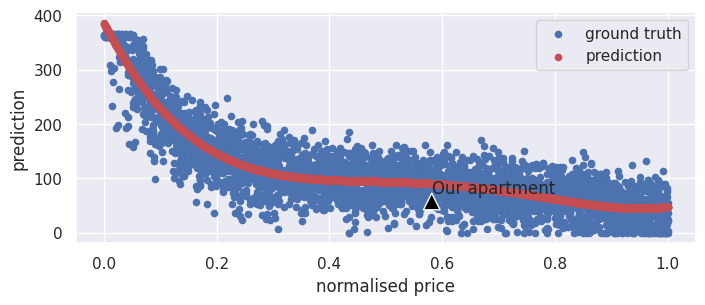

In [42]:
our_utilisation = test_ker.iat[0,5]
ax = test_ker.plot(x="normalised price",y="target", kind= "scatter", label = "ground truth")
test_ker.plot(x="normalised price",y="prediction", kind= "scatter", ax = ax, color = "r", label = "prediction")
ax.annotate('Our apartment', (normal_price, our_utilisation), arrowprops=dict(facecolor='black', shrink=0.05))

del(train_ker,train_ker_target,test_ker,test_ker_dfeat,ker_mae,grid,param_grid,transformed_price,poly)
del(our_utilisation,ax)

#### Kernels in SVR

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [43]:
# Limit size of training set to 25000 samples, take the first 
train_ksvr = train_ds3_dfeat.iloc[0:25000-1].copy()
train_ksvr['target'] = train_ds3['utilization']

test_ksvr = test_ds3_dfeat.copy()
test_ksvr['target'] = test_ds3['utilization']
test_ksvr_dfeat = test_ds3_dfeat[['number rooms', 'neighborhood group', 'normalised price', 'room type']]

# Define non-linear kernels to be applied to the SVR
param_grid = {'kernel': ['poly','rbf','sigmoid', 'rbf']} 

# Set cv to None to ensure 5-fold cross validation
grid = GridSearchCV(SVR(), param_grid, verbose = 3) 
grid.fit(train_ksvr[["normalised price"]], train_ksvr[['target']])
print(grid.best_params_) 
train_ksvr["prediction"] = grid.predict(train_ksvr[["normalised price"]])
display(train_ksvr)

test_ksvr['prediction'] = grid.predict(test_ksvr[['normalised price']])
display(test_ksvr.head())

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......................kernel=poly;, score=0.276 total time=  27.7s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......................kernel=poly;, score=0.267 total time=  28.3s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......................kernel=poly;, score=0.269 total time=  26.8s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......................kernel=poly;, score=0.275 total time=  27.0s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......................kernel=poly;, score=0.279 total time=  27.6s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........................kernel=rbf;, score=0.815 total time=  27.0s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........................kernel=rbf;, score=0.824 total time=  29.1s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........................kernel=rbf;, score=0.816 total time=  27.2s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........................kernel=rbf;, score=0.815 total time=  26.9s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........................kernel=rbf;, score=0.813 total time=  27.3s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .................kernel=sigmoid;, score=-245.103 total time=  37.9s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .................kernel=sigmoid;, score=-232.725 total time=  37.9s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .................kernel=sigmoid;, score=-245.151 total time=  38.2s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .................kernel=sigmoid;, score=-244.439 total time=  38.1s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .................kernel=sigmoid;, score=-247.417 total time=  37.9s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........................kernel=rbf;, score=0.815 total time=  20.1s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........................kernel=rbf;, score=0.824 total time=  20.1s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........................kernel=rbf;, score=0.816 total time=  20.3s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........................kernel=rbf;, score=0.815 total time=  20.4s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........................kernel=rbf;, score=0.813 total time=  20.3s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'kernel': 'rbf'}


,number rooms,neighborhood group,room type,normalised price,target,prediction
6627,1,2,0,0.362609,105.765754,104.648593
31131,0,1,0,0.777391,91.306801,67.447287
64823,0,1,0,0.534783,120.592497,90.984992
10206,0,2,2,0.723478,38.111607,73.311294
14726,0,2,2,0.644348,83.864034,79.947053
...,...,...,...,...,...,...
20140,0,2,0,0.839130,93.039699,58.801335
20890,3,2,0,0.779130,27.835891,67.229117
39654,0,2,2,0.146957,158.318349,193.352489
64058,0,1,0,0.096522,277.302585,249.643293


,number rooms,neighborhood group,room type,normalised price,target,prediction
25150,1,2,0,0.732174,86.857461,72.476831
2967,2,2,0,0.710435,73.967153,74.498124
29477,1,1,0,0.242609,192.388486,125.577604
36802,3,2,0,0.924348,30.537510,47.381537
53104,1,1,0,0.375652,125.671184,104.075840


What is the mean absolute error achieved on the test data?

In [44]:
ksvr_mae = 1/len(test_ksvr)*sum(abs(test_ksvr['prediction']-test_ksvr['target']))
print('The mean absolute error achieved on the test data is: ' + str(round(ksvr_mae,3)))

The mean absolute error achieved on the test data is: 27.543


Show (draw!) the price elasticity for your apartment. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


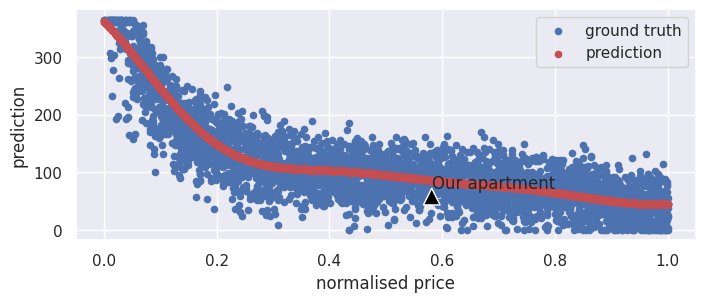

In [45]:
our_utilisation = test_ksvr.iat[0,5]
ax = test_ksvr.plot(x="normalised price",y="target", kind= "scatter", label = "ground truth")
test_ksvr.plot(x="normalised price",y="prediction", kind= "scatter", ax = ax, color = "r", label = "prediction")
ax.annotate('Our apartment', (normal_price, our_utilisation), arrowprops=dict(facecolor='black', shrink=0.05))

del(train_ksvr,test_ksvr,test_ksvr_dfeat,ksvr_mae,grid,param_grid)
del(our_utilisation,ax)

What is your conclusion on using kernels?

_Answer:_ 
*As it can be clearly seen from the initial data visualisation and the high Mean Absolute Errors (MEAs) obtained in the Linear Regression subsection, the data is nonlinearly separable, and therefore a hyperplane misclasiffies many points.*

*The utilisation of kernels in SVM enable an efficient way of determining non linear decision boundaries in our model without the need of increasing the dimension of the feature space. This is because we apply the kernel to the inner products in the original feature space. The dimension increase of the feature space was done in the subsection Kernels in Regression.*

*By trying different Kernel combinations, highly accurate non-linear decision boundaries can be obtained. This feature highlights however, a disadvantage of using SVMs and kernels and it is that it requires a very careful design and initialisation. Additionally, by using many kernels in a consecutive order, it can be easy to overfit the data.*

*The accuracy of this model can be seen when we compare the MEAs obtained with other models.* *A table summarising the MEA of all the models obtained until the current is summarised below.*


Learning Price Elasticity Method       | Mean Absolute Error (MEA)
----------------------|------------------
Linear Regression     | Row 1, Col 2 
Linear SVR            | Row 2, Col 2 
Kernels in Regression | Row 2, Col 2 
Kernels in SVR        | Row

#### Neural Network

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [46]:
train_nn = train_ds3_dfeat.copy()
train_nn['target'] = train_ds3['utilization']
train_nn_dfeat = train_ds3_dfeat.copy()
train_nn_target = train_ds3['utilization']

test_nn = test_ds3_dfeat.copy()
test_nn['target'] = test_ds3['utilization']
test_nn_dfeat = test_ds3_dfeat.copy()

net = MLPRegressor(hidden_layer_sizes=(50,),activation='logistic',max_iter = 1000, learning_rate_init = 0.001)

net.fit(train_nn_dfeat,train_nn_target)
train_nn['prediction'] = net.predict(train_nn_dfeat)
display(train_nn.head())

test_nn['prediction'] = net.predict(test_nn_dfeat.to_numpy())
display(test_nn.head())

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,number rooms,neighborhood group,room type,normalised price,target,prediction
6627,1,2,0,0.362609,105.765754,130.923330
31131,0,1,0,0.777391,91.306801,83.026696
64823,0,1,0,0.534783,120.592497,105.580413
10206,0,2,2,0.723478,38.111607,57.805783
14726,0,2,2,0.644348,83.864034,65.917807


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


,number rooms,neighborhood group,room type,normalised price,target,prediction
25150,1,2,0,0.732174,86.857461,91.456194
2967,2,2,0,0.710435,73.967153,94.267194
29477,1,1,0,0.242609,192.388486,145.360323
36802,3,2,0,0.924348,30.537510,67.959053
53104,1,1,0,0.375652,125.671184,120.490258


What is the mean absolute error achieved on the test data?

In [47]:
nn_mae = 1/len(test_nn)*sum(abs(test_nn['prediction']-test_nn['target']))
print('The mean absolute error achieved on the test data is: ' + str(round(nn_mae,3)))

The mean absolute error achieved on the test data is: 19.11


Show (draw!) the price elasticity for your apartment. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


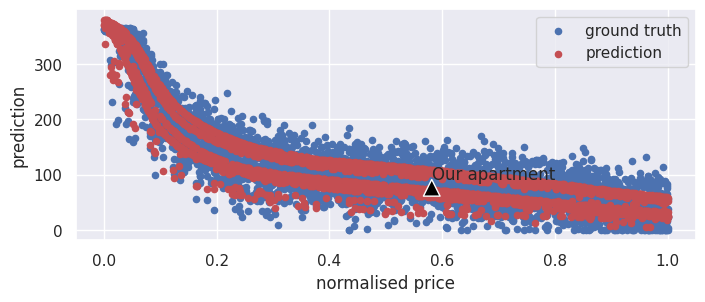

In [48]:
our_utilisation = test_nn.iat[0,5]
ax = test_nn.plot(x="normalised price",y="target", kind= "scatter", label = "ground truth")
test_nn.plot(x="normalised price",y="prediction", kind= "scatter", ax = ax, color = "r", label = "prediction")
ax.annotate('Our apartment', (normal_price, our_utilisation), arrowprops=dict(facecolor='black', shrink=0.05))


del(train_nn,train_nn_dfeat,train_nn_target,test_nn,test_nn_dfeat,nn_mae)
del(our_utilisation,ax)

### Profit discrepencies when incorporating price elasticity

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [49]:
# Import Data from Decision Tree and Clustering predictions
# Manually Label Encode the dataset
price_elasticity_pred_dict = {'number rooms': [2, 1, 1], 'neighborhood group': ['Manhattan', 'Manhattan', 'Staten Island'], 'room type': ['Entire home/apt', 'Private room', 'Shared room' ]}
price_elasticity_pred = pd.DataFrame(data=price_elasticity_pred_dict)

pe_pred = price_elasticity_pred[['number rooms']].apply(encoder_num_rooms.transform)
pe_pred[['neighborhood group']] = price_elasticity_pred[['neighborhood group']].apply(encoder_neigh_group.transform)
pe_pred[['room type']] = price_elasticity_pred[['room type']].apply(encoder_room_type.transform)

pe_pred_clust = pe_pred.copy()
pe_pred_dt = pe_pred.copy()

pe_pred_clust['normalised price'] = NormalizeData([your_apartment[3], manhattan_private_clust, staten_island_shared_clust], train_price_max, train_price_min)
pe_pred_dt['normalised price'] = NormalizeData([700, manhattan_private_dtree, staten_island_shared_dtree], train_price_max, train_price_min)

# Determine utilisation for each of the predicted prices:
utilisation_dt = net.predict(pe_pred_dt[['number rooms', 'neighborhood group', 'room type', 'normalised price']])
utilisation_clust = net.predict(pe_pred_clust[['number rooms', 'neighborhood group', 'room type', 'normalised price']])

# Total profit for each apartment and each case. Profit = price * utilisation
profit_dt = utilisation_dt * [700, manhattan_private_dtree, staten_island_shared_dtree]
profit_clust = utilisation_clust * [your_apartment[3], manhattan_private_clust, staten_island_shared_clust]

# Display of results
print('Profit gained from using Decision Tree price for each apartment: ' + str(np.around(profit_dt, 2)))
print('Profit gained from using Clustering price for each apartment: ' + str(np.around(profit_clust, 2)))

for i in range(3):
  print('For apartment with # rooms ' + str(price_elasticity_pred_dict['number rooms'][i]), ' in neighborhood ' + str(price_elasticity_pred_dict['neighborhood group'][i])
  + ' and apartment type ' + str(price_elasticity_pred_dict['room type'][i]))
  print('Profit difference: ' + str(round(np.abs(profit_clust[i]- profit_dt[i]),2)))

  #del(df3,i,profit_dt,your_apartment,manhattan_private_clust,staten_island_shared_clust)
  #del(manhattan_private_dtree,staten_island_shared_dtree,pe_pred_clust,utilisation_clust,profit_clust)
  #del(utilisation_dt,net,pe_pred_dt,train_price_max,train_price_min,pe_pred,price_elasticity_pred,encoder_neigh_group,encoder_num_rooms,encoder_room_type)

Profit gained from using Decision Tree price for each apartment: [76568.48 45829.71  9737.71]
Profit gained from using Clustering price for each apartment: [77464.11 50142.83  9726.16]
For apartment with # rooms 2  in neighborhood Manhattan and apartment type Entire home/apt
Profit difference: 895.63
For apartment with # rooms 1  in neighborhood Manhattan and apartment type Private room
Profit difference: 4313.13
For apartment with # rooms 1  in neighborhood Staten Island and apartment type Shared room
Profit difference: 11.55


_Answer:_

The model that best captures price elasticity, is the model that has the lowest MAE when applied to unseen data, i,e. the test dataset. From the previous analysis, it can be seen that this is achieved by the Neural Networks. The predictions carried out here, are assumed to be the ground truth of the utilisation.

Therefore, the aim now is to determine which of the prices predicted using Clustering and Decision Tree is the optimal price to maximise profit. Three apartments were considered: your apartment, 1 private room in Manhattan and 1 share room in Staten Island.

It can be seen that even though, the clustering algorithm has a higher MAE and therefore is less accurate in its price prediction, the profit obtained is higher for the 1 private Manhattan room and for the 1 shared Staten Island room. On the other hand, for your apartment it would be best to use the price prediction from the Decision Tree.

# Question 4: Conclusion

_Answer:_ 

In this assignment we have been able to succesfully predict which price should be stablished for an AirBnB in order to obtain maximum profit out of it. We will now review the tasks performed toward this goal.

### Question 1
Firstly, given the original dataset, its essential to remove those instances or features which give little to no information in relation of our goal. This allows us to work with an smaller dataset and facilitate working with it (less memory usage and running time). Attending to instances, we perfomed two basic chores: removing incomplete data and duplicates. We have reduced in 1866 instances the dataset. We then obtain some basic descriptive statistics and data visualization of the price (boxplot and histogram). This helps us easily analize roughly the validity of the outputs obtained during the asignment. For the histogram, we have intendedly try different amount of bins in order to find one which doesn't over or underfit the data while being intuitive for the readers (70.000 thousand instances in 70 bins).

Our dataset has an average price 625.46 dollars, with a standart deviation of 331.24 dollars. Both the first (340.00 dollars) and third (913.00 dollars) quartile are equidistant in relation with the mean value. This statement along with the boxplot and the histogram shows us a relativily uniform distribution.

There are 19 features for each instance in the dataset. The first approach is to inspect if each of them reveals useful information for our task. We realise three of these instances (country, country code and instant bookable) have a unique value throughout all the dataset, and therefore don't add any additional informacion in relation to the price. Although ID does not give information in relation with the price, it is kept as an index to help position instances inside of the dataset. Host id has a similar task. We only need one indexing feature. Hence, it can be discarded. Price will be one of our main target so it must remain in the dataset. 

Eventhough latitude and longitude give significant information about the apartments, there are two other features, neighborhood and neighborhood group that describe the location of the apartment. If we extrapolate to real-life situations, some neighbourhoods are merely divided by physical barriers (i.e. avenues, streets or canals) but have a completely different appeal and atractiveness for turists. Also, these two features require more geographical information like neighborhoods barriers and preprocessing to be inspected. Based on this and other examples, we wouldn't consider latitude and longitude from now on. 

Another way of cleaning a dataset is to find correlations between two features. This allows us to obtain a second feature directly from the first one and in consequence we could only work with one of them. We have succesfully obtained this relationship for the price and the service fee. Since the price will be one of our target features, we wouldn't consider the service fee. 

On the other hand, when applying the same reasoning to the minimum number of nights, the result where quite different. The price and the minimum number of nights are not linearly related. What is interesant is that prices for each minimum number of nights apparently cover all the price range. Their coefficient of determination is null, so this features is not useful in the pricing the decisition. 

We can also analyse each feature's instances (univariate analysis) and how it affects the price. We have done it via boxplots. This way we have reach some conclusions, which are more widely explained in the related answer box. One of the main conclusion is that cancellation policy does  For example, the number of rooms is essential in order to determine the price. The neighbourhood group considered by itself does not unravel price information. 

In this line of thought, we continue with the multivariate analysis. This allows use to correlate three features: price and two other. We have expound on this analysis in the corresponding answer box. To summarize, we have not found an obvious way to consider the construction year, which may need obtaining more data or other preprocessing that is not required for this assignment. The cancellation policy does not seem to affect the pricing, so it should be discarded from the continuing analysis.The other three feautures considered (number of rooms, room type and neighbourhood group) have a relevant impact in the pricing. The neighbourhood group is not as influential as the other two characteristics, but still important.


\

### Question 2

#### Decision Tree

First of all, we create a new column called Price_Bins in the train_ds and test_ds dataframes. The values in this column will be the result of applying the pd.cut function to the price column in each dataframe. This function is used to bin continuous data (price of our apartments) into our desired intervals.

Then, we create a decision tree with our training data. How it is done is by splitting the data via the most relevant feature, and doing it again for each of the splits. Therefore, we end with a decision tree that determines the price bin in which to put an apartment given its descriptive features (that is, by "walking down the tree with each feature").

Once we have formed our tree, we start evaluating how well it predicts price using the test dataset, and we do that by taking the mean of the predicted price bin and comparing it to the real price of an apartment. Our decision tree most of the times gives accurate approximations of the price, while in the minority of cases the predicted price differs greatly from the real price.

#### Clustering

First of all, we perform One-Hot-Encoding in order to be able to measure our categorical values. Then, we choose the number of clusters by performing our K-Means clustering algorithm with a varying amount of clusters, and end obtaining the apartment price using $k=9$.

As discussed avobe, at the end of question 2, this method for pricing the apartment is not as good for our AirBnB example as the Discussion Tree method, because of its higher Mean Absolute Error.

#### Conclusion of Question 2

In the end, we end up being able to approximately predict prices of the apartment and we then can move to other tasks, such as predicting apartment utilisation, as donee in Question 3.

\

### Question 3

Once we have obatin not only one but two ways to price an apartment, we take into consideration the utilisation of said AirBnB. The more use your apartment has, more profit. But the utilization is directly related to the price. So, a new feature is taken into consideration: the utilization. As we did before, we do some basic data visualization to understand this new variable. 

The aim of this part of the assignment is to stablish a method to obtain the utilization of the apartment given the price and therefore obtain the maximum profit out of it. Instead of using the price, we have developed a function whose output is the normalised price, which speeds up the code. We apply Label Encoder, given that previously we have used One Hot Encoding, to show a different approach.

As previously done for the price, we divide the dataset into a train set and a test set. To assure the well-functioning of out algorithms, all of them have built-in k-cross-fold validation, which splits the trainset in k subdataset and considers one as a test set, and the remaining subdataset as the train data. We perform, as asked, a 5-cross-fold validation. 

We try five different algorithms: regression, linear support vector regression, Kernels in regression, kernel in linear support vector regression and neural networks. Each of them has succesfully given a prediction method which is performed in the test dataset. We obtain the mean absolute error for each method (comparting the prediction and the real utilization) and a utilization prediction for our apartment. We have chose to use the price obtained through clustering. This is only a visualization to complete the prediction method. When obtaining the final utilization, the resulting price from the binning method is also analysed. 

The smallest value for the mean absolute error is given by the neural networks method. As a consequence, we select this as our utilization prediction algorithm.

Lastly, we compare the two pricing mechanism based on the utilization for both of the prices. We take into account three apartments: 1 private room in Manhattan, 1 shared room in Staten Island and our apartment, a 2-room apartment in Manhattan. For the first two, the clustering price results in more utilization. On the other hand, for our apartment using the binning result would mean bigger profit.

The most advantageous pricing would be 700 dollars for a 2-room apartment in Manhattan.

In these text we have summarize all the steps taken in order to price an AirBnB, starting off a non-cleaned dataset, resulting in a convenient price adjusted considering its utilization. 
